<a href="https://colab.research.google.com/github/JoeyBarlia/Superstore-Analysis/blob/main/Superstore_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency

In [350]:
df = pd.read_csv('SuperStoreOrders.csv')
df.head()

order_id order_date ship_date       ship_mode    customer_name  \
0     AG-2011-2040   1/1/2011  6/1/2011  Standard Class  Toby Braunhardt   
1    IN-2011-47883   1/1/2011  8/1/2011  Standard Class      Joseph Holt   
2     HU-2011-1220   1/1/2011  5/1/2011    Second Class    Annie Thurman   
3  IT-2011-3647632   1/1/2011  5/1/2011    Second Class     Eugene Moren   
4    IN-2011-47883   1/1/2011  8/1/2011  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name sales quantity  \
0  Office Supplies      Storage          Tenex Lockers, Blue   408        2   
1  Office Supplies     Supplies     Acme Trimmer, High Speed   120        3   
2  Office Supplies      Storage      Tenex Box, Single Width    66        4   
3  Office Supplies        Paper  Enermax Note Cards, Premium    45        3   
4        Furniture  Furnishings   Eldon Light Bulb, Duo Pack   114        5   

   discount   profit  shipping_cost  order_priority  year  
0       0.0  106.140          35.46          Medium  2011  
1       0.1   36.036           9.72          Medium  2011  
2       0.0   29.640           8.17            High  2011  
3       0.5  -26.055           4.82            High  2011  
4       0.1   37.770           4.70          Medium  2011  

[5 rows x 21 columns]

In [351]:
df.tail()

order_id  order_date ship_date       ship_mode     customer_name  \
51285  CA-2014-115427  31-12-2014  4/1/2015  Standard Class        Erica Bern   
51286    MO-2014-2560  31-12-2014  5/1/2015  Standard Class         Liz Preis   
51287  MX-2014-110527  31-12-2014  2/1/2015    Second Class  Charlotte Melton   
51288  MX-2014-114783  31-12-2014  6/1/2015  Standard Class     Tamara Dahlen   
51289  CA-2014-156720  31-12-2014  4/1/2015  Standard Class     Jill Matthias   

         segment             state        country  market   region  ...  \
51285  Corporate        California  United States      US     West  ...   
51286   Consumer  Souss-Massa-Draâ        Morocco  Africa   Africa  ...   
51287   Consumer           Managua      Nicaragua   LATAM  Central  ...   
51288   Consumer         Chihuahua         Mexico   LATAM    North  ...   
51289   Consumer          Colorado  United States      US     West  ...   

              category sub_category  \
51285  Office Supplies      Binders   
51286  Office Supplies      Binders   
51287  Office Supplies       Labels   
51288  Office Supplies       Labels   
51289  Office Supplies    Fasteners   

                                          product_name sales quantity  \
51285  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl    14        2   
51286          Wilson Jones Hole Reinforcements, Clear     4        1   
51287           Hon Color Coded Labels, 5000 Label Set    26        3   
51288           Hon Legal Exhibit Labels, Alphabetical     7        1   
51289                              Bagged Rubber Bands     3        3   

       discount   profit  shipping_cost  order_priority  year  
51285       0.2   4.5188           0.89          Medium  2014  
51286       0.0   0.4200           0.49          Medium  2014  
51287       0.0  12.3600           0.35          Medium  2014  
51288       0.0   0.5600           0.20          Medium  2014  
51289       0.2  -0.6048           0.17          Medium  2014  

[5 rows x 21 columns]

It seems that at some point, order_date was entered in a different format. dd/mm/yyyy to yyyy-mm-dd. Lets standardize.

In [352]:
df['order_date'] = df['order_date'].astype('datetime64[ns]')
df['ship_date'] = df['ship_date'].astype('datetime64[ns]')

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  object        
 15  qu

 'Sales' is numeric and should not be an object.

In [354]:
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

Check for null values

In [355]:
df.isnull().sum()

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             2630
quantity             0
discount             0
profit               0
shipping_cost        0
order_priority       0
year                 0
dtype: int64

In [356]:
df['sales'] = df['sales'].fillna(0)

Text(0, 0.5, 'Profit')

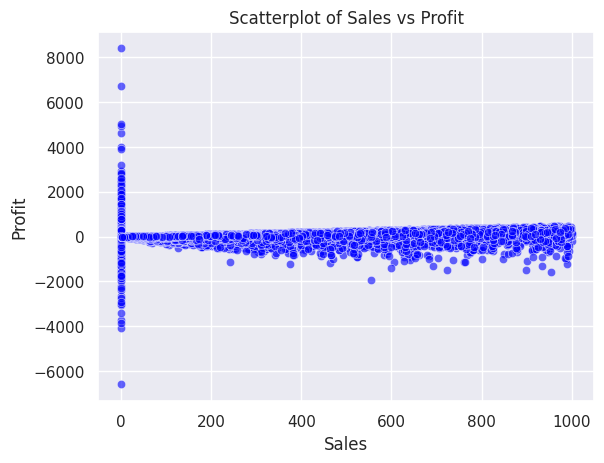

In [357]:
sns.scatterplot(x='sales', y='profit', data=df, color='blue', alpha=0.6)

plt.title('Scatterplot of Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

In the 2630 rows where 'sales' was missing, 'profit' contained extreme positive and negative outliers. I want to look into profit margins in my analysis so I will drop these rows since they throw off the calculation. They represent 5% of total rows.  

In [358]:

df = df.drop(df[df['sales'] == 0].index)

Does every row correspond to a unique order ID?

In [359]:
df['order_id'].value_counts()

order_id
MX-2014-166541     13
IN-2013-42311      13
IN-2012-41261      13
NI-2014-8880       13
TO-2014-9950       13
                   ..
MX-2013-147767      1
ES-2013-1245292     1
ID-2013-60637       1
AL-2013-7280        1
CA-2014-156720      1
Name: count, Length: 24386, dtype: int64

No. Some repeat up to 14 times. Will keep this in mind.

###Feature Engineering

In [360]:
#month column
df['order_month'] = df['order_date'].dt.month

#Naming the months
m={1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}

df['order_month']=[m[i] for i in df['order_month']]

In [361]:
#I originally thought sales corresponded to quantity of items sold.
#Originally I called this feature Profit Rate (a measure of profit per item sold)
#After investigation I found that sales corresponds to revenue. So this feature is profit margin. A much more useful feature
df['profit_margin'] = df['profit']/df['sales']

In [362]:
#days to ship aka lead time
df['lead_time'] = df['ship_date'] - df['order_date']
df['lead_time'] = df['lead_time'].dt.days

df.head()

order_id order_date  ship_date       ship_mode    customer_name  \
0     AG-2011-2040 2011-01-01 2011-06-01  Standard Class  Toby Braunhardt   
1    IN-2011-47883 2011-01-01 2011-08-01  Standard Class      Joseph Holt   
2     HU-2011-1220 2011-01-01 2011-05-01    Second Class    Annie Thurman   
3  IT-2011-3647632 2011-01-01 2011-05-01    Second Class     Eugene Moren   
4    IN-2011-47883 2011-01-01 2011-08-01  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  sales  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...  408.0   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...  120.0   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   66.0   
3  Home Office        Stockholm     Sweden      EU    North  ...   45.0   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...  114.0   

  quantity discount   profit  shipping_cost  order_priority  year  \
0        2      0.0  106.140          35.46          Medium  2011   
1        3      0.1   36.036           9.72          Medium  2011   
2        4      0.0   29.640           8.17            High  2011   
3        3      0.5  -26.055           4.82            High  2011   
4        5      0.1   37.770           4.70          Medium  2011   

   order_month  profit_margin lead_time  
0      January       0.260147       151  
1      January       0.300300       212  
2      January       0.449091       120  
3      January      -0.579000       120  
4      January       0.331316       212  

[5 rows x 24 columns]

#Analysis

##Product Categories

Which is the top selling category?

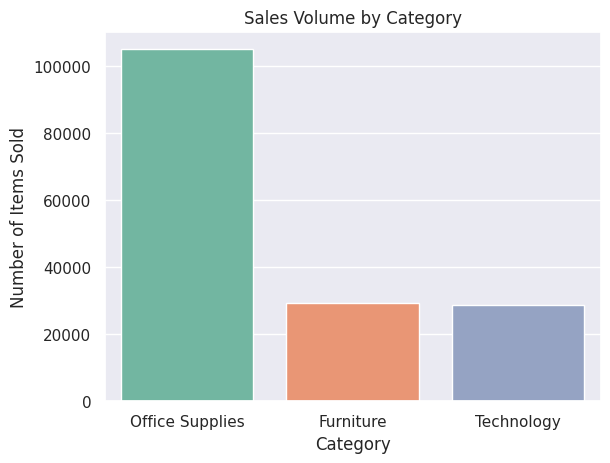

In [363]:

sns.barplot(x='category', y='quantity', data=df, estimator=sum, errorbar=None, hue='category', palette='Set2')
plt.title('Sales Volume by Category')
plt.xlabel('Category')
plt.ylabel('Number of Items Sold')
plt.show()

Which is the highest grossing product category?

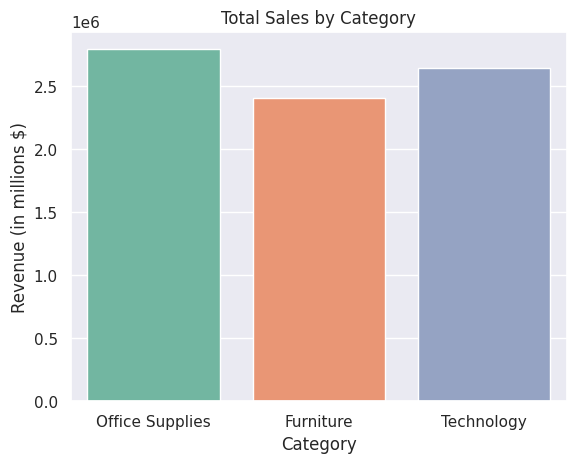

In [364]:
sns.barplot(x='category', y='sales', data=df, estimator=sum, errorbar=None, hue='category', palette='Set2')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Revenue (in millions $)')
plt.show()

Which is the most profitable category?

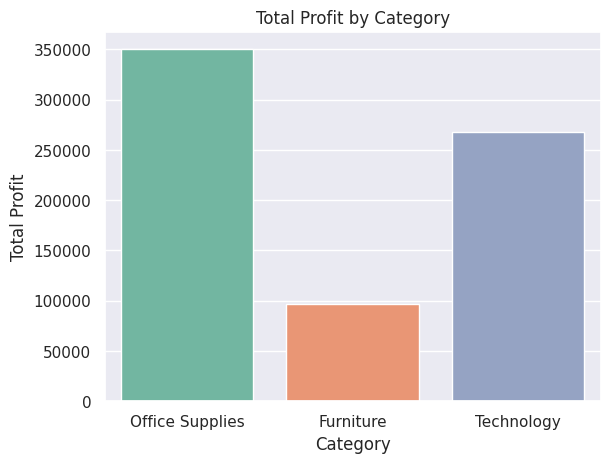

In [365]:
sns.barplot(x='category', y='profit', data=df, estimator=sum, errorbar=None, hue='category', palette='Set2')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

Which product category has the highest profit margin?


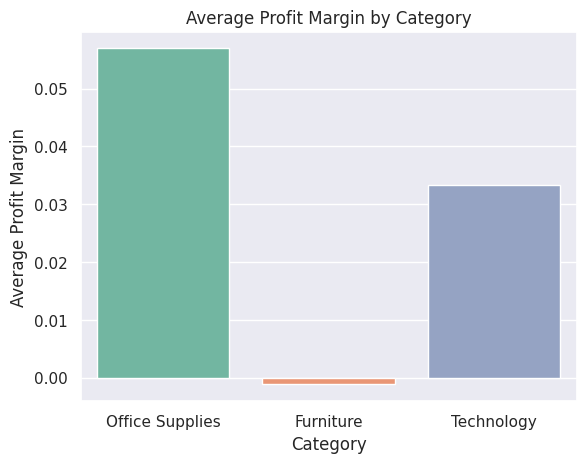

In [366]:
sns.barplot(x='category', y='profit_margin', data=df, errorbar=None, hue='category', palette='Set2')
plt.title('Average Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Average Profit Margin')
plt.show()

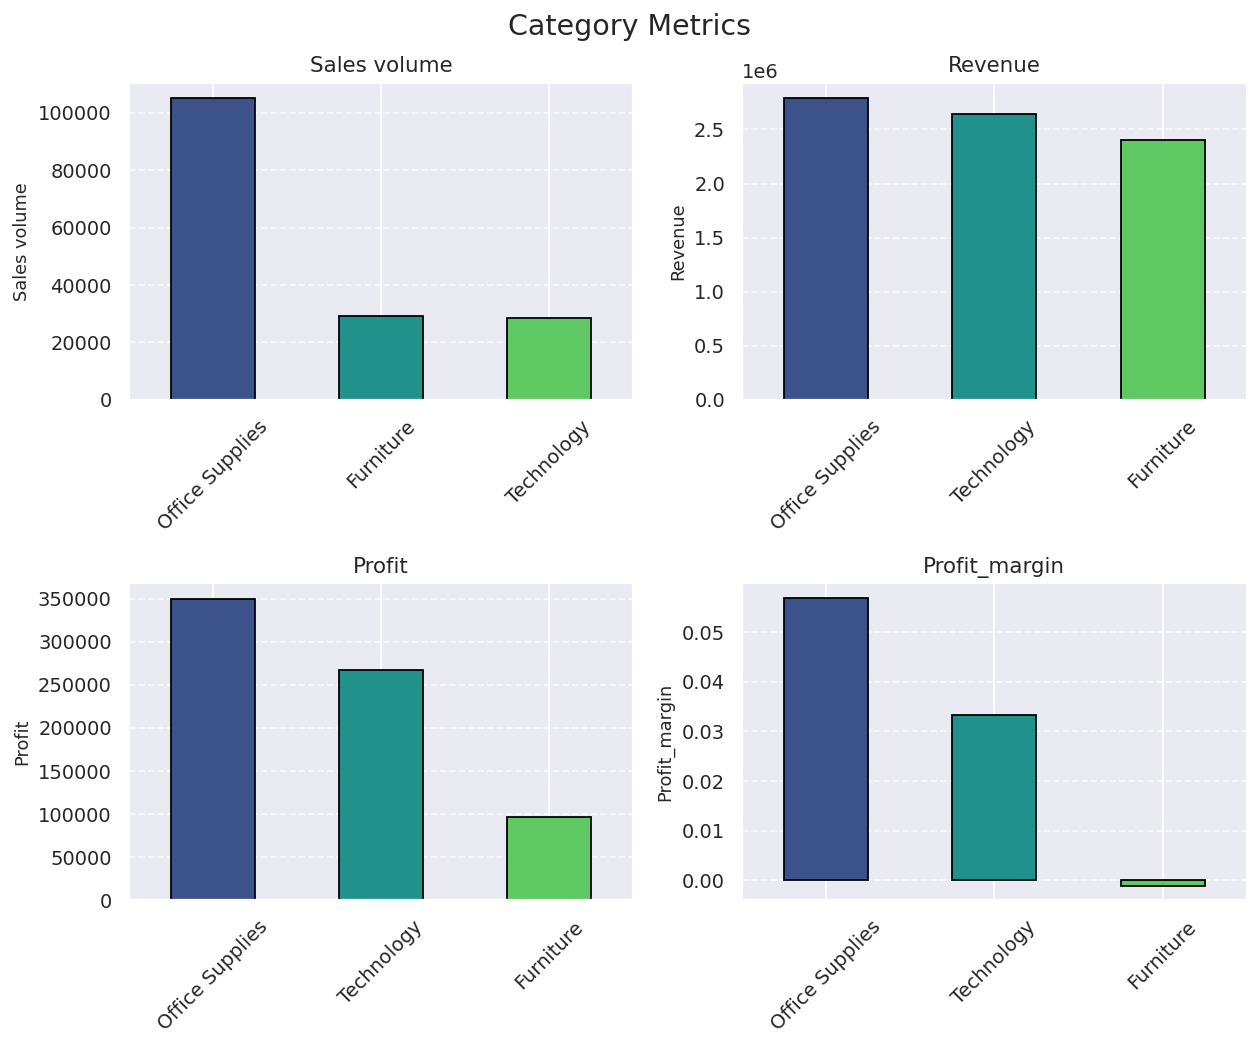

In [367]:
df_category = df.groupby('category').agg({
    'sales': 'sum',
    'profit': 'sum',
    'quantity': 'sum',
    'profit_margin': 'mean'
})

df_category.rename(columns={'sales': 'Revenue', 'quantity': 'Sales Volume'}, inplace=True)

palette = sns.color_palette('viridis', len(df_category))

fig, axes = plt.subplots(2, 2, dpi=128, figsize=(10, 8))
columns = ['Sales Volume', 'Revenue', 'profit', 'profit_margin']

for ax, col in zip(axes.flatten(), columns):
    colors = palette[:len(df_category[col])]
    df_category[col].sort_values(ascending=False).plot(
        kind='bar',
        ax=ax,
        color=colors,
        edgecolor='black'
    )
    ax.set_title(f'{col.capitalize()}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel(col.capitalize(), fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.suptitle('Category Metrics', fontsize=16, y=1.02)
plt.show()


The sales volume of technology products is the lowest, profit is relatively high compared to sales volume. This may be because technology products tend to be more expensive and have relatively large profit margins. Based on this, the company should seek to increase their technology sales.


Furniture products have poor profits and even poorer profit margins so the company should focus on cost control, such as optimizing procurement costs, production costs, and shipping costs, to improve their profit margins. In addition, offering furniture products that are up to date with current fashion trends should be heavily considered to attract more consumers to purchase furniture products.

##Subcategories

Which is our top selling product subcategory?

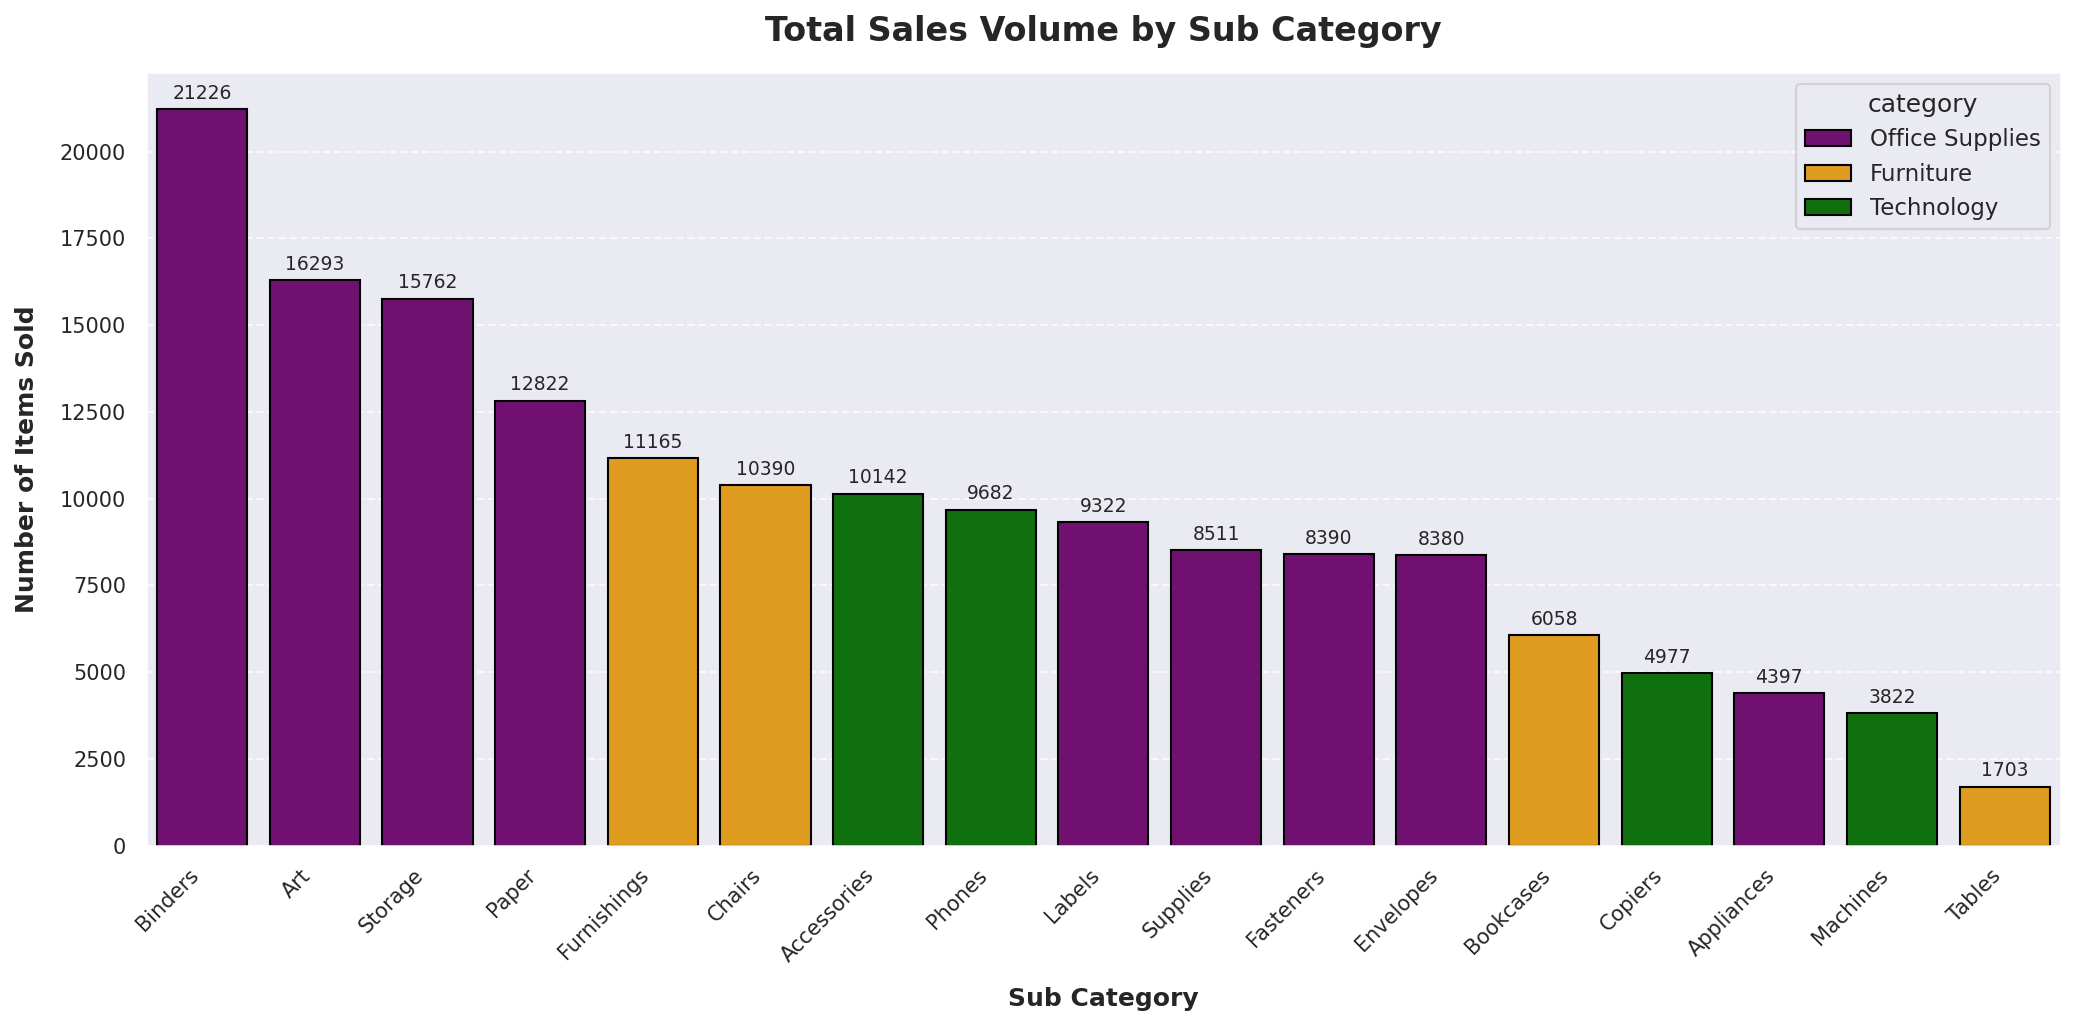

In [368]:
sorted_subcategory_profit = (df.groupby(['sub_category', 'category'])['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False))

sns.set_theme(style='darkgrid')

category_colors = {
    'Office Supplies': 'Purple',
    'Furniture': 'Orange',
    'Technology': 'Green'}

plt.figure(dpi=150, figsize=(14, 7))
sns.barplot(x='sub_category', y='quantity', hue='category', data=sorted_subcategory_profit, palette=category_colors, edgecolor='black')

plt.title('Total Sales Volume by Sub Category', fontsize=16, weight='bold', pad=15)
plt.xlabel('Sub Category', fontsize=12, weight='bold', labelpad=10)
plt.ylabel('Number of Items Sold', fontsize=12, weight='bold', labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f', fontsize=9, label_type='edge', padding=3)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

What is the highest grossing product subcategory?

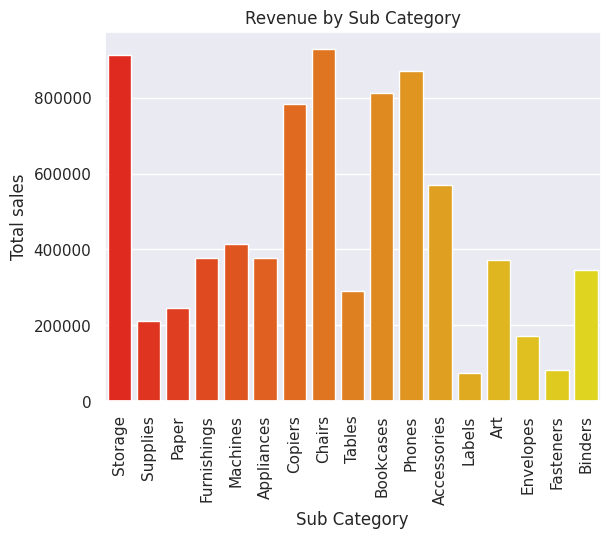

In [369]:
sns.barplot(x='sub_category', y='sales', data=df, estimator=sum, errorbar=None, hue='sub_category', palette='autumn')
plt.title('Revenue by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Total sales')
plt.xticks(rotation=90, ha='center')
plt.show()

Which is our most profitable subcategory?

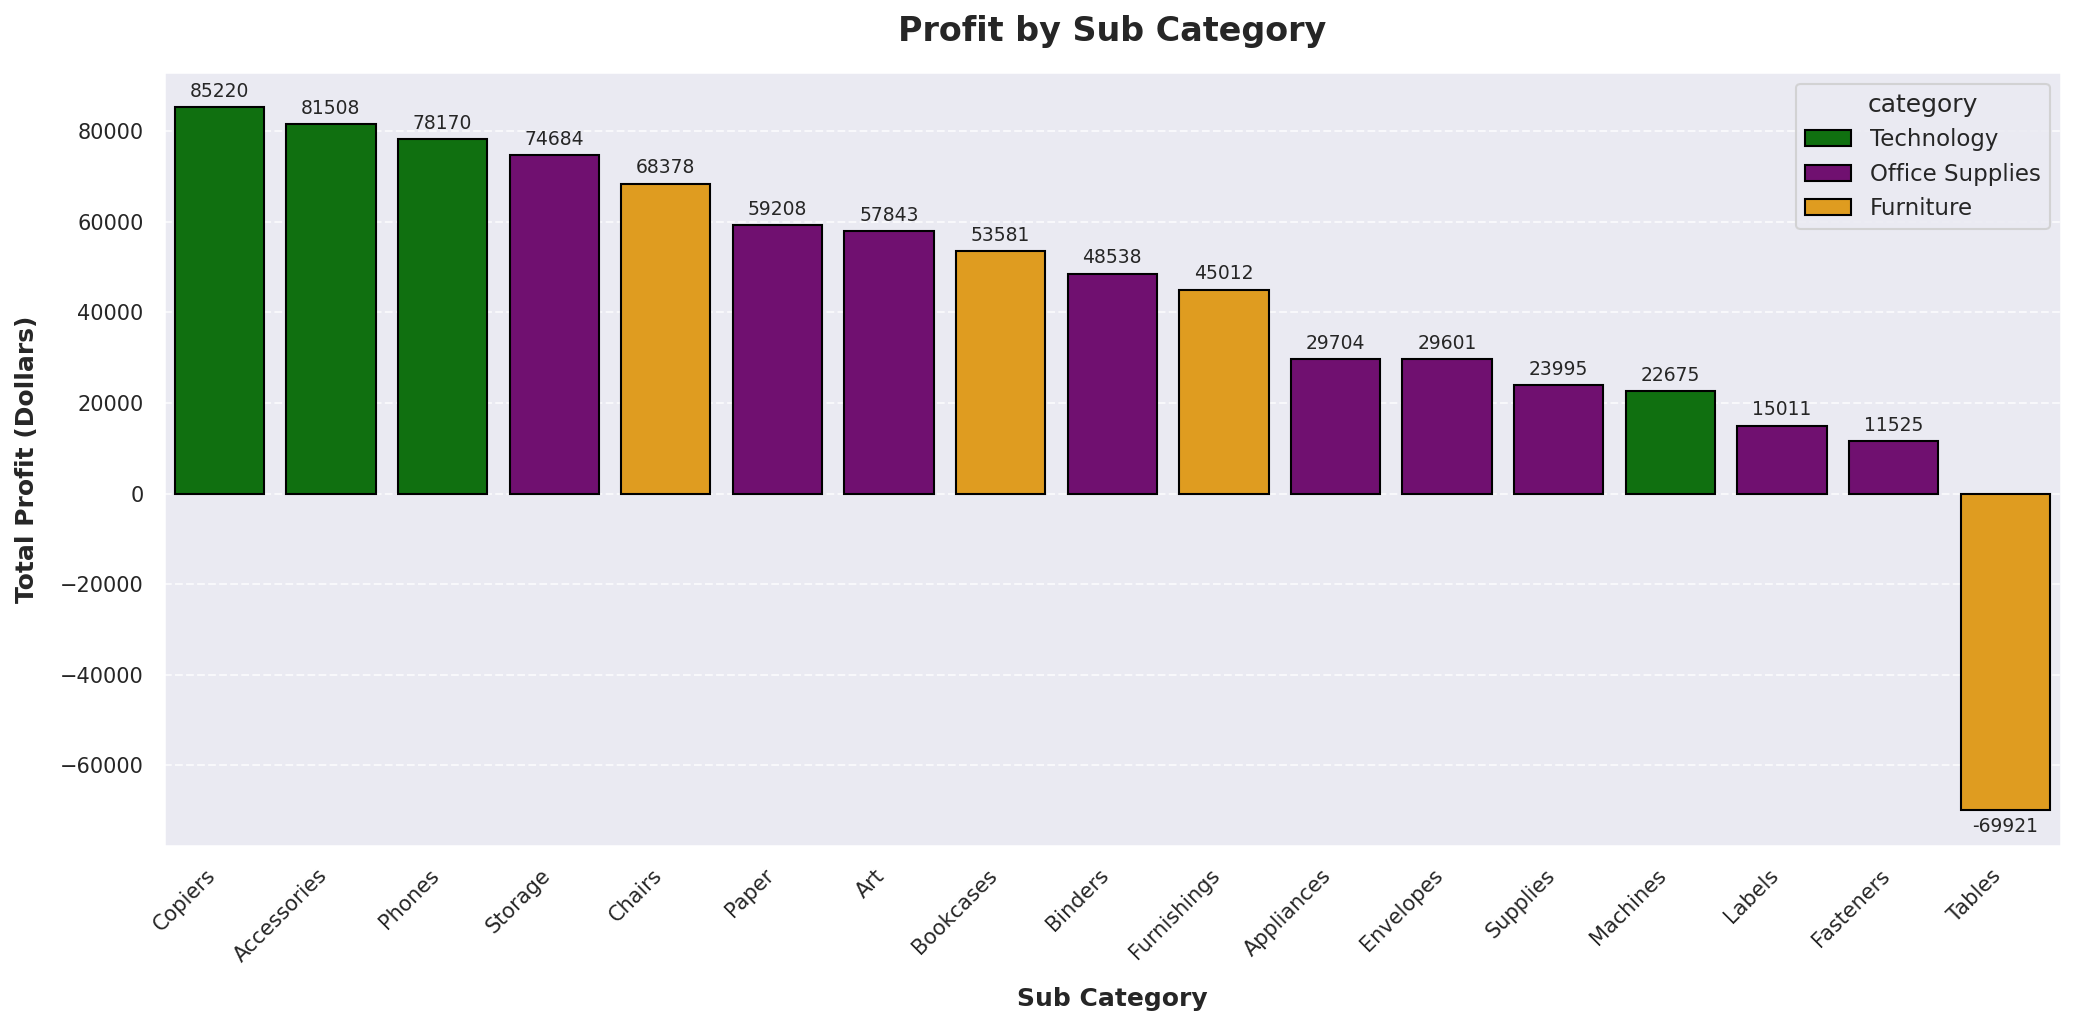

In [370]:
sorted_subcategory_profit = (df.groupby(['sub_category', 'category'])['profit'].sum().reset_index().sort_values(by='profit', ascending=False))

plt.figure(dpi=150, figsize=(14, 7))
sns.barplot(x='sub_category', y='profit', hue='category', data=sorted_subcategory_profit, palette=category_colors, edgecolor='black')

plt.title('Profit by Sub Category', fontsize=16, weight='bold', pad=15)
plt.xlabel('Sub Category', fontsize=12, weight='bold', labelpad=10)
plt.ylabel('Total Profit (Dollars)', fontsize=12, weight='bold', labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f', fontsize=9, label_type='edge', padding=3)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Most profitable subcategories are copiers, phones, and bookcases. Least profitable are fasteners, labels, and supplies. Most notably, tables has negative profit.

What are the profit margins of product subcategories?

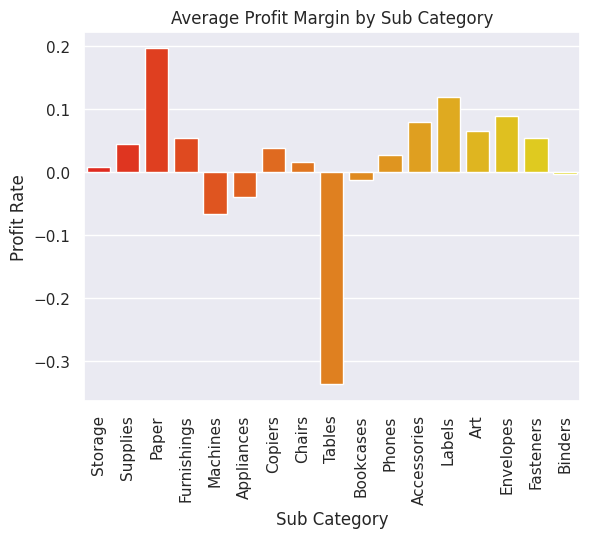

In [371]:
sns.barplot(x='sub_category', y='profit_margin', data=df, errorbar=None, hue='sub_category', palette='autumn')
plt.title('Average Profit Margin by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Profit Rate')
plt.xticks(rotation=90, ha='center')
plt.show()

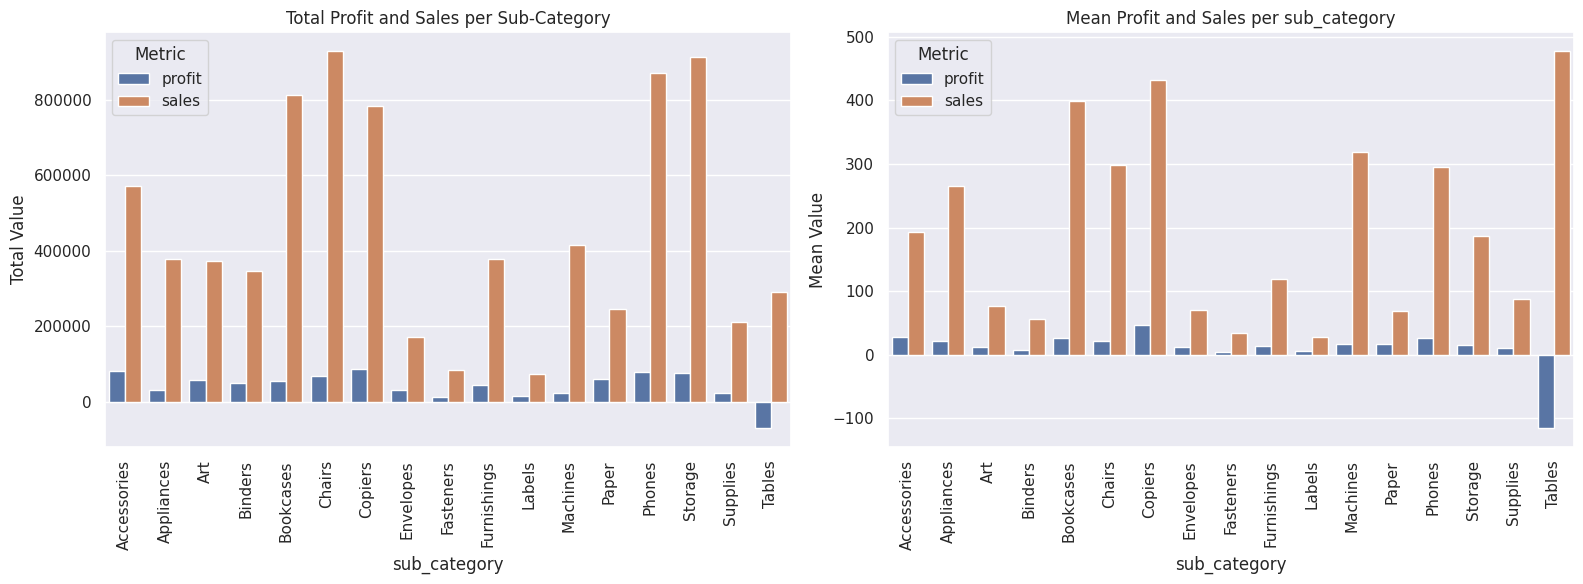

In [372]:
grouped_sum = df.groupby('sub_category')[['profit', 'sales']].sum().reset_index()
grouped_mean = df.groupby('sub_category')[['profit', 'sales']].mean().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=grouped_sum.melt(id_vars='sub_category', var_name='Metric', value_name='Value'), x='sub_category', y='Value', hue='Metric', ax=axes[0])
axes[0].set_title('Total Profit and Sales per Sub-Category')
axes[0].set_ylabel('Total Value')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(data=grouped_mean.melt(id_vars='sub_category', var_name='Metric', value_name='Value'), x='sub_category', y='Value', hue='Metric', ax=axes[1])
axes[1].set_title('Mean Profit and Sales per sub_category')
axes[1].set_ylabel('Mean Value')
axes[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

Tables have the lowest sales volume but operate at such a loss that the company should discontinue tables.

Copiers, accesories, and phones are on the lower end of sales volume but are highly profitable. The company should seek to strengthen sales of these products.

For office supplies, storage equipment and binders make up a large part of sales volume but have very low profit margins. The compnay should consider optimizing the cost structure or adjusting pricing strategies to increase their profit margins.

Here is a better visualization of categories/subcategories

In [373]:
fig = px.sunburst(df,path=['category','sub_category'],
values='quantity',color='category', hover_data =['sales','quantity','profit'])
fig.update_layout(height=800,title_text='Sales Volume of Product Categories & Sub-Categories')
fig.show()

Are some subcategories discounted more than others?

In [374]:
df['discount'].value_counts()

discount
0.000    27556
0.200     4757
0.100     3692
0.400     3098
0.600     1988
0.700     1770
0.500     1589
0.470      711
0.170      673
0.150      452
0.002      395
0.270      375
0.450      326
0.800      310
0.300      294
0.250      176
0.070      111
0.402      103
0.350       91
0.370       69
0.202       40
0.602       23
0.320       23
0.650       16
0.570       10
0.550        9
0.850        2
Name: count, dtype: int64

Some items are heavily discounted

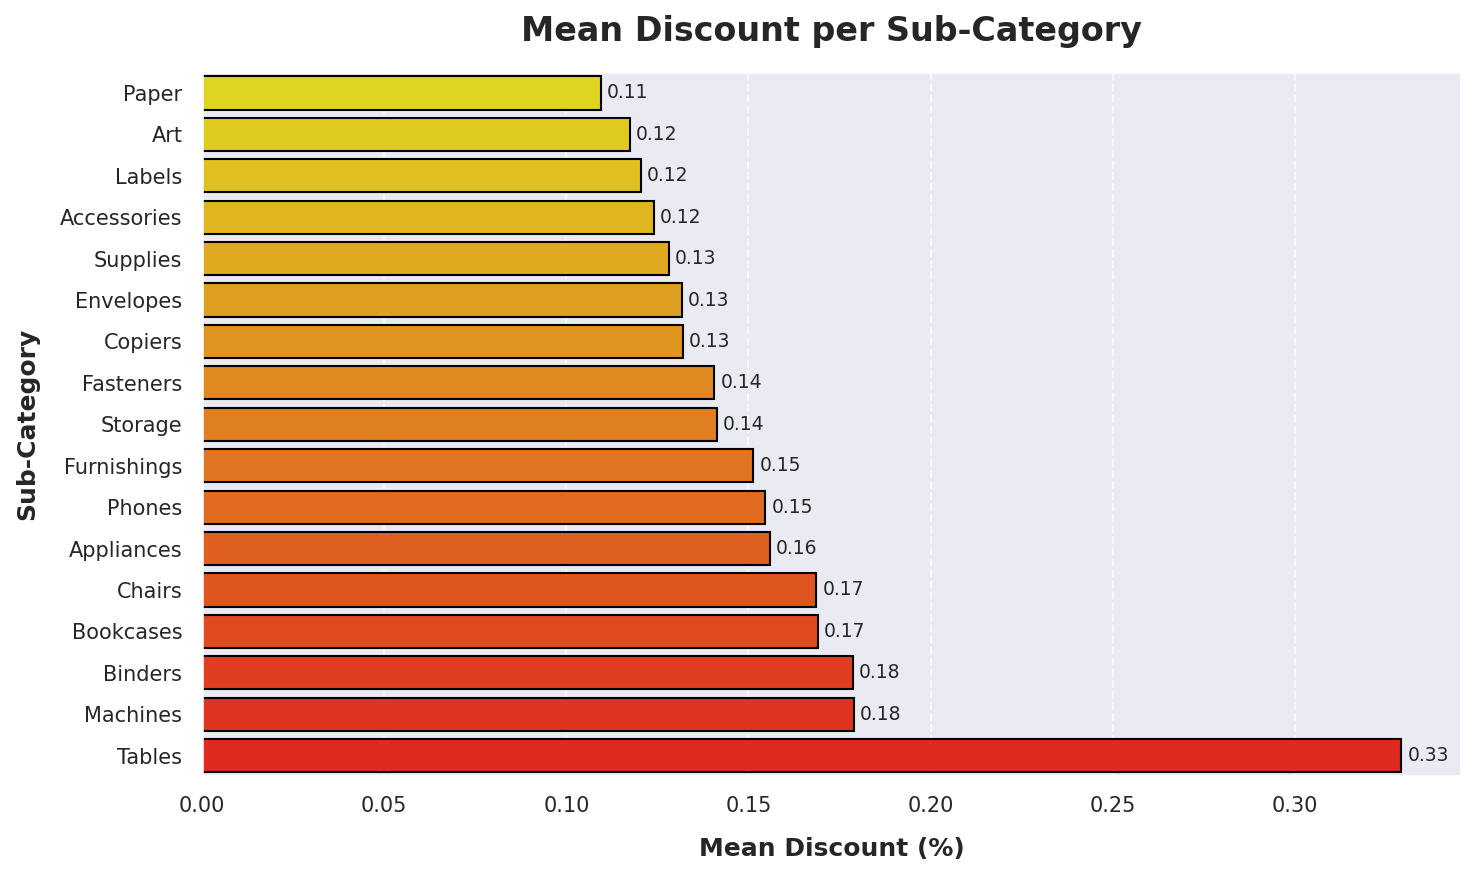

In [375]:
grouped_discount_mean = (df.groupby('sub_category')['discount'].mean().reset_index().sort_values(by='discount', ascending=True))

fig, axes = plt.subplots(figsize=(10, 6), dpi=150)
sns.barplot(data=grouped_discount_mean, x='discount', y='sub_category', ax=axes, hue='sub_category',palette='autumn_r', edgecolor='black')

axes.set_title('Mean Discount per Sub-Category', fontsize=16, weight='bold', pad=15)
axes.set_xlabel('Mean Discount (%)', fontsize=12, weight='bold', labelpad=10)
axes.set_ylabel('Sub-Category', fontsize=12, weight='bold', labelpad=10)
axes.tick_params(axis='y', labelsize=10)
axes.tick_params(axis='x', labelsize=10)

for container in axes.containers:
    axes.bar_label(container, fmt='%.2f', fontsize=9, label_type='edge', padding=3)

axes.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The store's discount system is unorganized and inefficient.

-Tables are the most heavily discounted subcategory despite operating at a loss.

-Best-selling products (Binders, Art, Storage, Paper) can be sold with no discount.

-Products with limited sales and higher profitability (Copiers, Accesories, Phones)should be sold at a higher discount to attract customers.


##Products

What are the 20 top selling products?

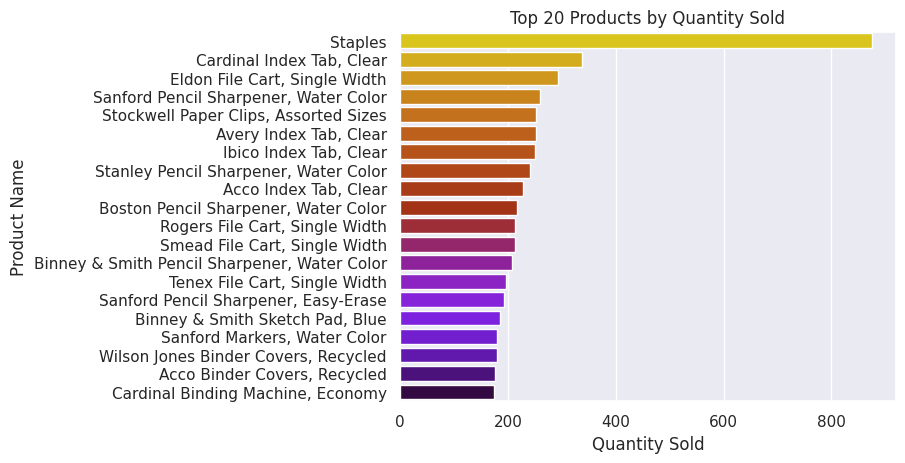

In [376]:
top_profit_quantities = df.groupby('product_name')['quantity'].sum().nlargest(20).reset_index()

sns.barplot(y='product_name', x='quantity', data=top_profit_quantities, hue='product_name', palette='gnuplot_r')
plt.title('Top 20 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

Do these products coincide with the 20 that bring the most profit?

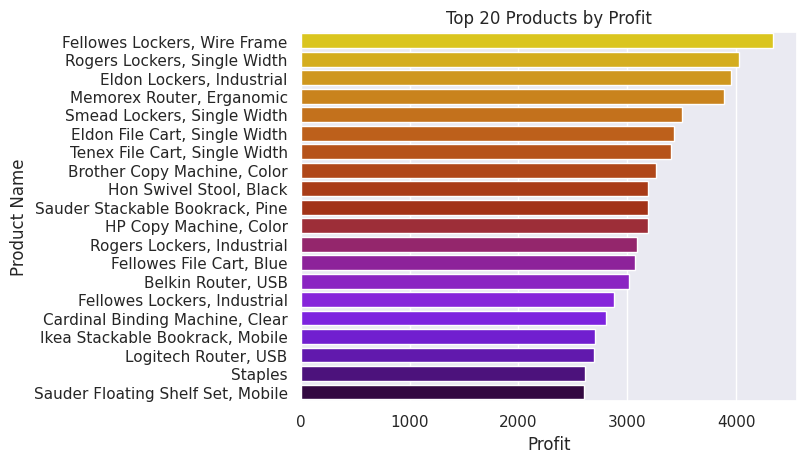

In [377]:
top_profit_quantities = df.groupby('product_name')['profit'].sum().nlargest(20).reset_index()

sns.barplot(y='product_name', x='profit', data=top_profit_quantities, hue='product_name', palette='gnuplot_r')
plt.title('Top 20 Products by Profit')
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.show()

File carts appear repeatedly in both plots. They are our top performing products. These products are like the milk in a grocery store, an in-demand product that attracts customers to the store with the hope that they will make additional purchases. File cabinets should be treated like the company's 'milk'. Placed at the back of the stores.

What are our 20 least popular products?

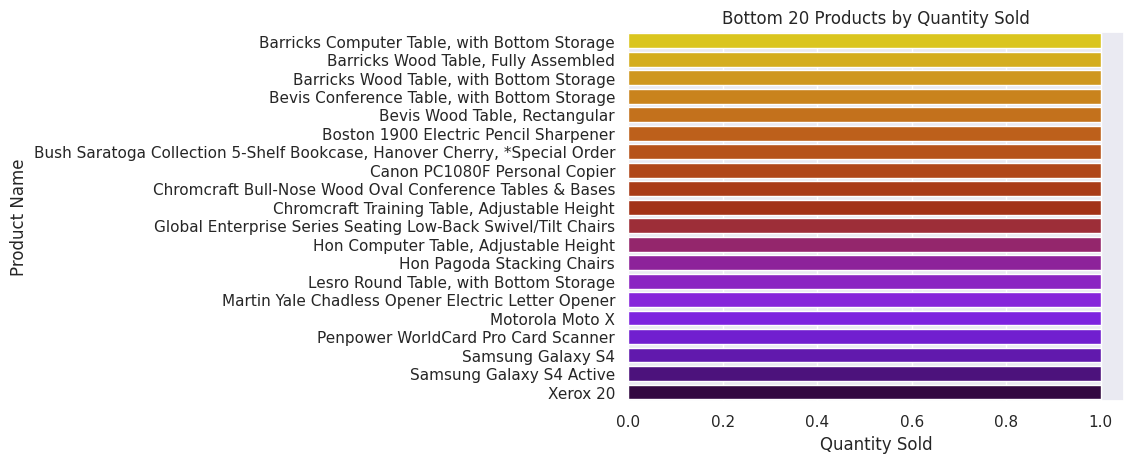

In [378]:
bottom_profit_quantities = df.groupby('product_name')['quantity'].sum().nsmallest(20).reset_index()

sns.barplot(y='product_name', x='quantity', data=bottom_profit_quantities, hue='product_name', palette='gnuplot_r')
plt.title('Bottom 20 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

Bottom 20 products were all purchased once. Lets look at more products.

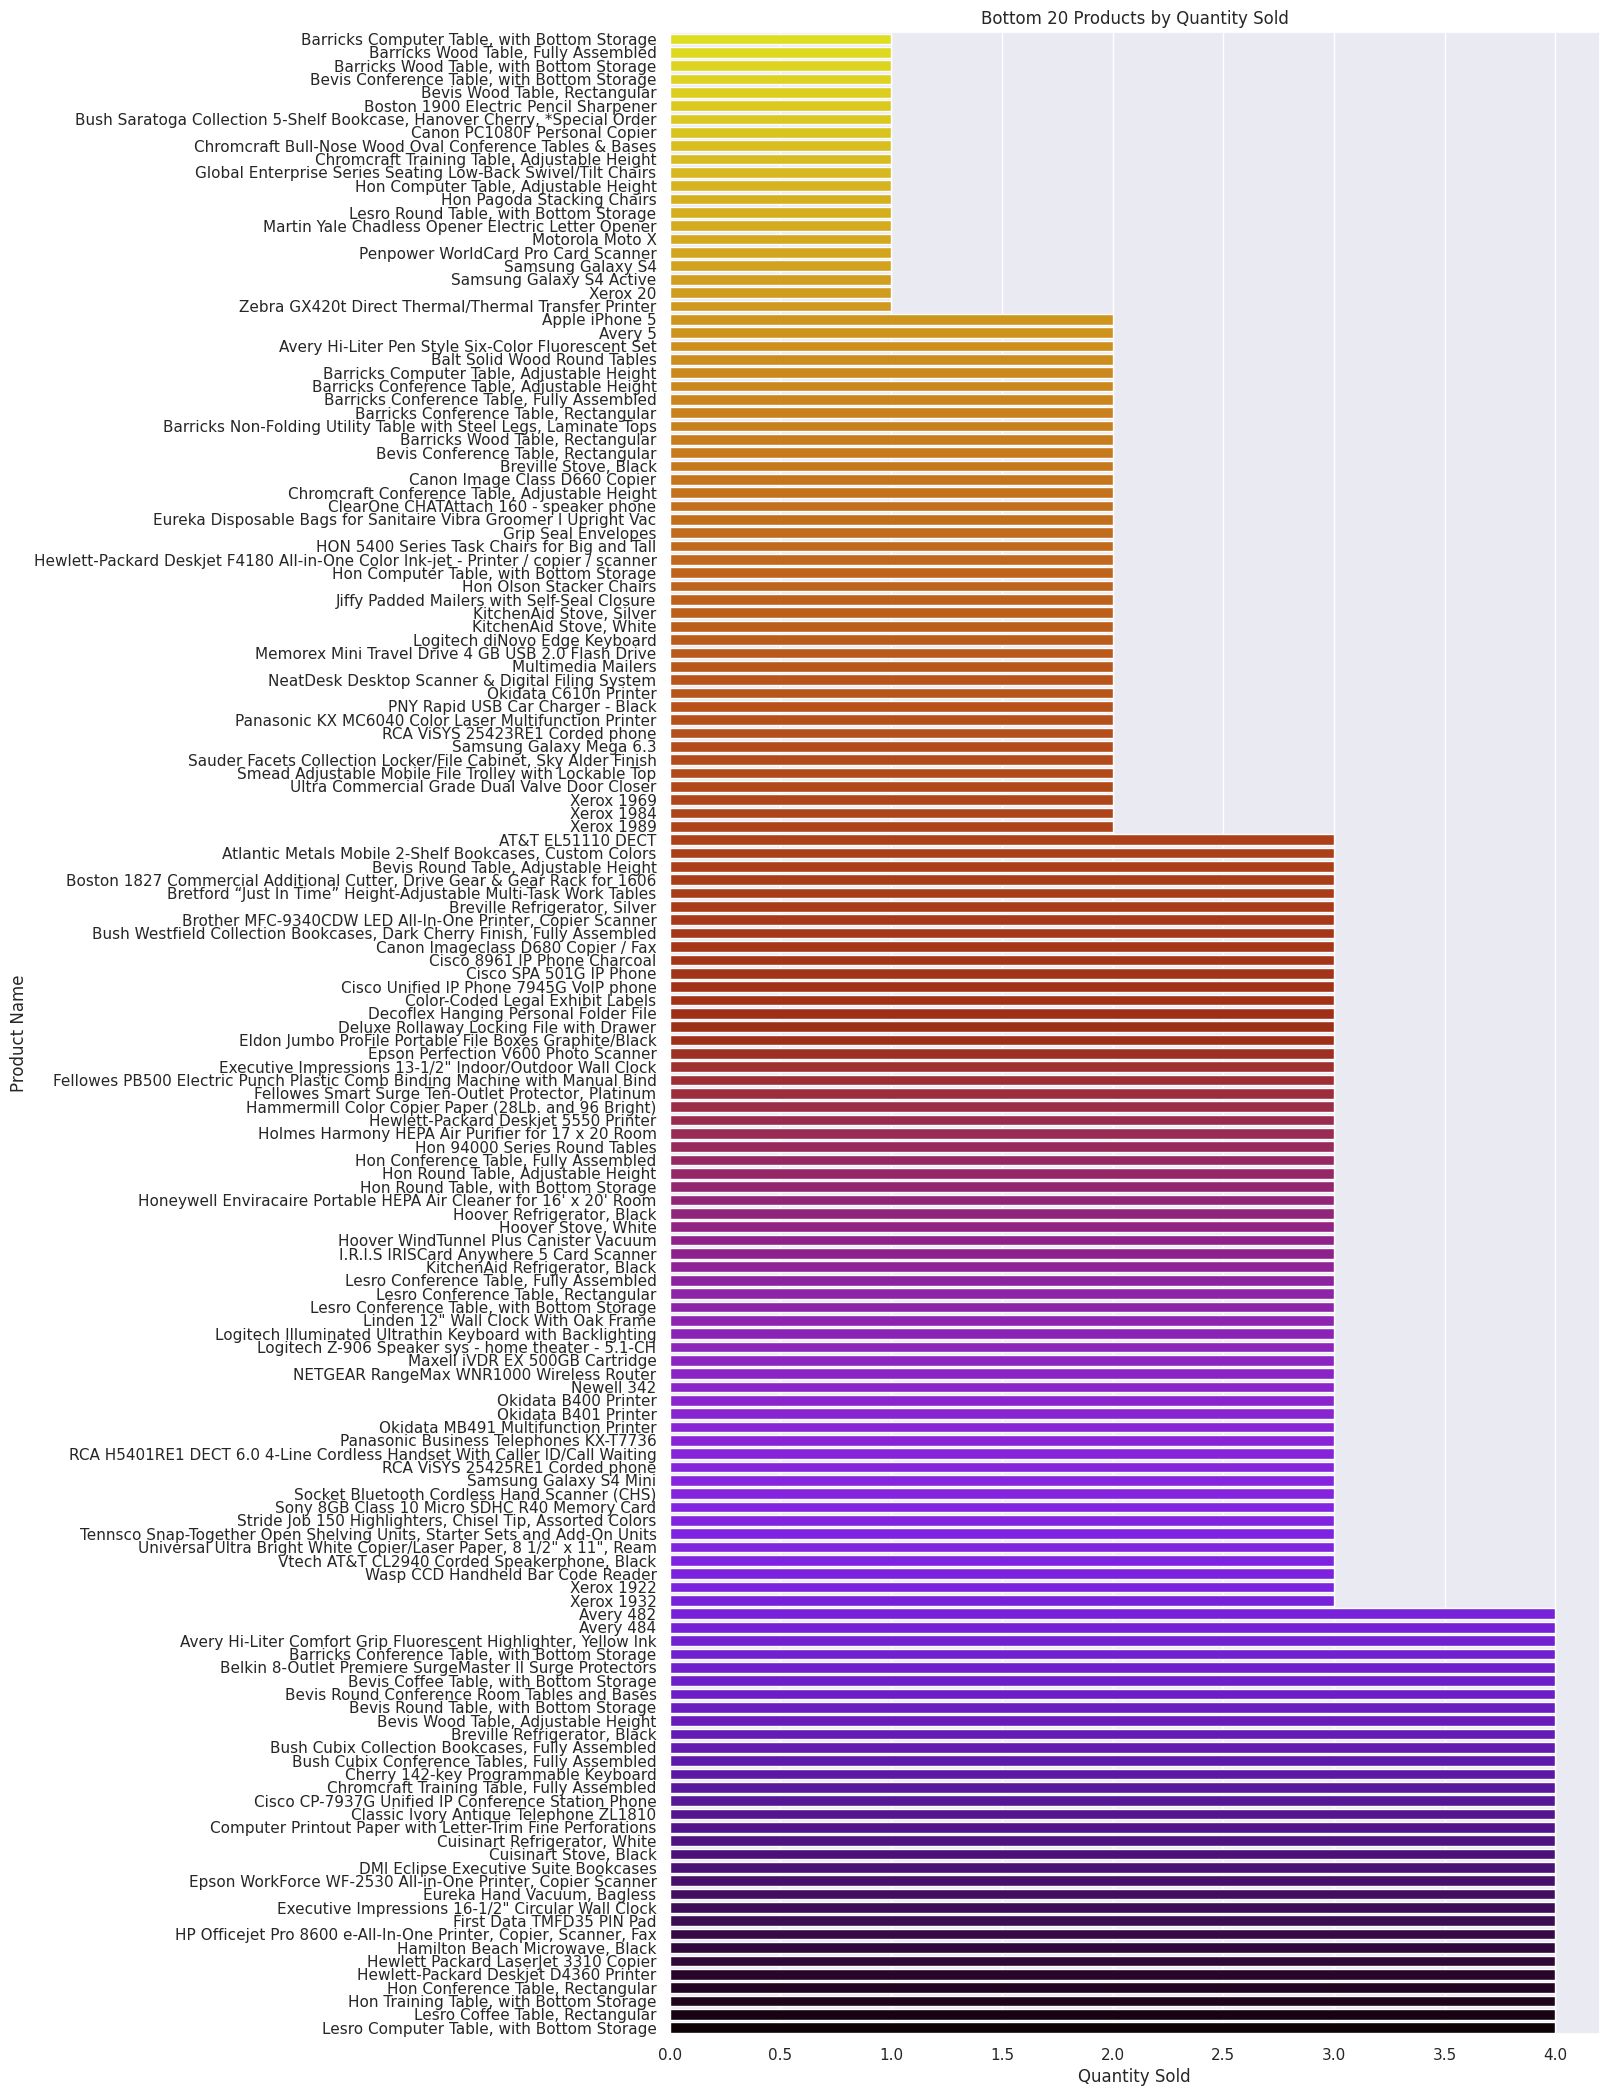

In [379]:
bottom_profit_quantities = df.groupby('product_name')['quantity'].sum().nsmallest(150).reset_index()

plt.figure(figsize=(12, 26))
sns.barplot(y='product_name', x='quantity', data=bottom_profit_quantities, hue='product_name', palette='gnuplot_r')
plt.title('Bottom 20 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

The company's inventory needs some serious streamlining. A large number of items were only sold a few times over the course of the 4 year period of data collection (January 2011 to December 2014). The company should stop offering these items. To procure and keep these items stored likely incurs a loss that exceeds sale price.

What are the top products by profit margin?

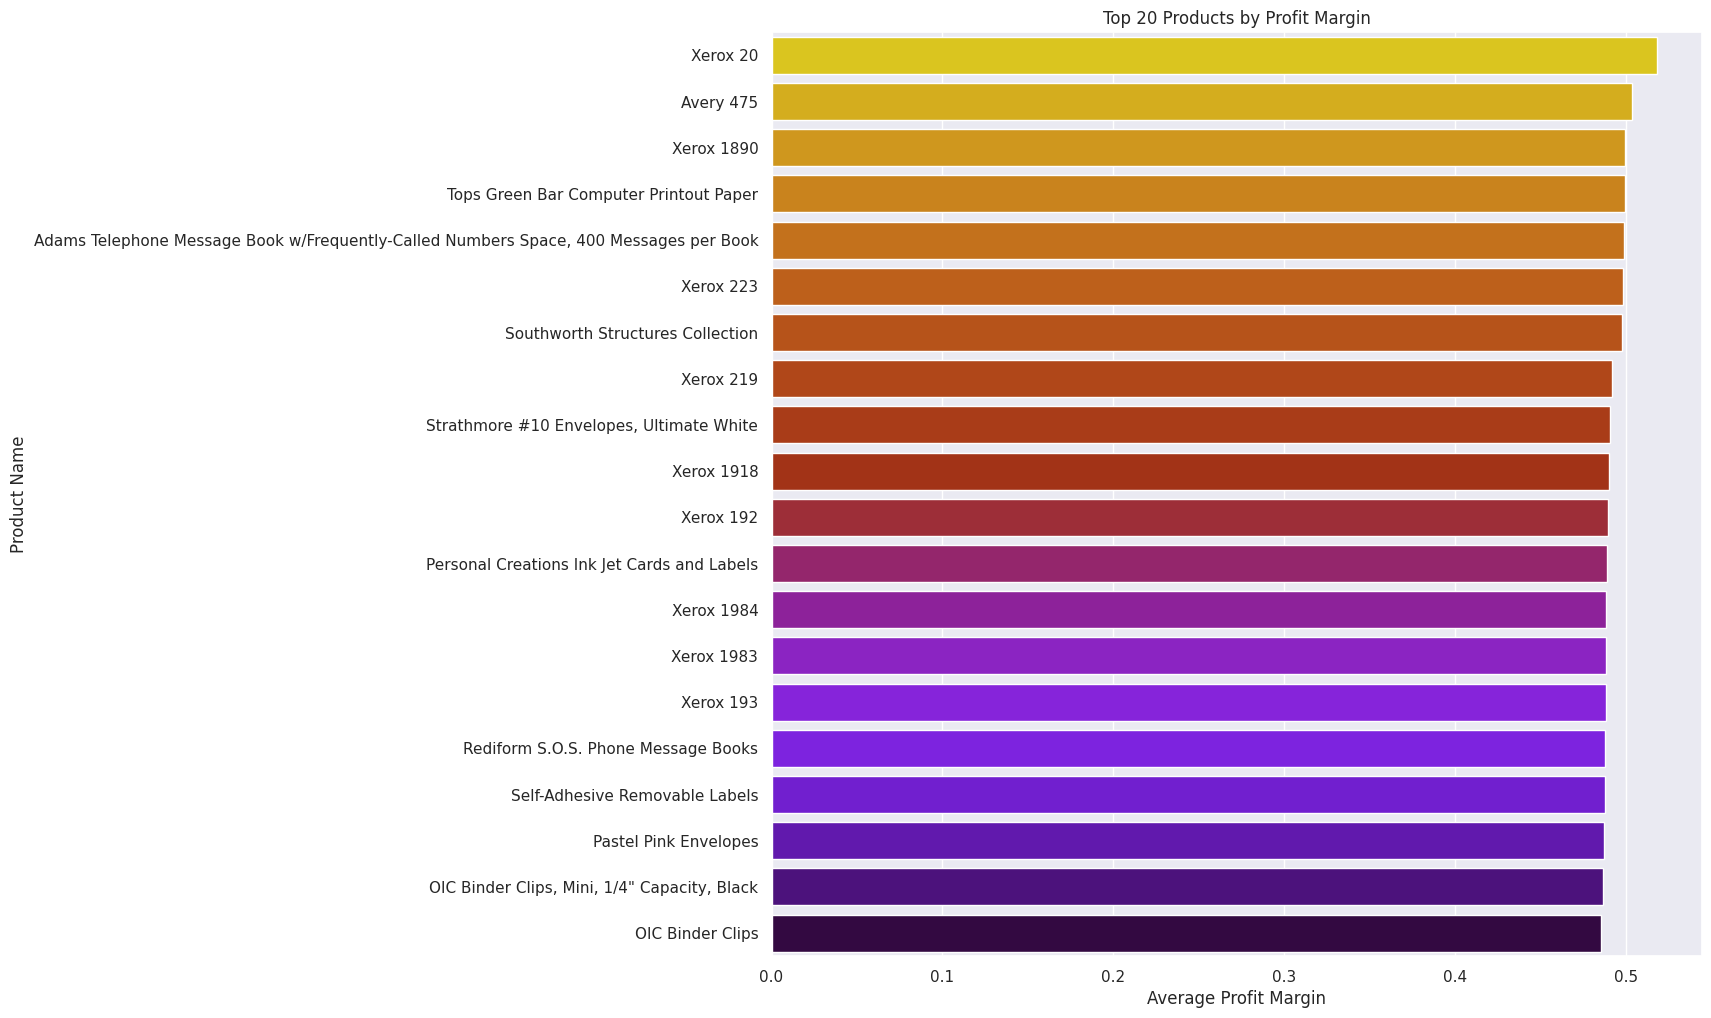

In [380]:
product_profit_margins = df.groupby('product_name')['profit_margin'].mean().nlargest(20).reset_index()

plt.figure(figsize=(12, 12))
sns.barplot(y='product_name', x='profit_margin', data=product_profit_margins, hue='product_name', palette='gnuplot_r')
plt.title('Top 20 Products by Profit Margin')
plt.xlabel('Average Profit Margin')
plt.ylabel('Product Name')
plt.show()

What subcategories do the above products belong to?

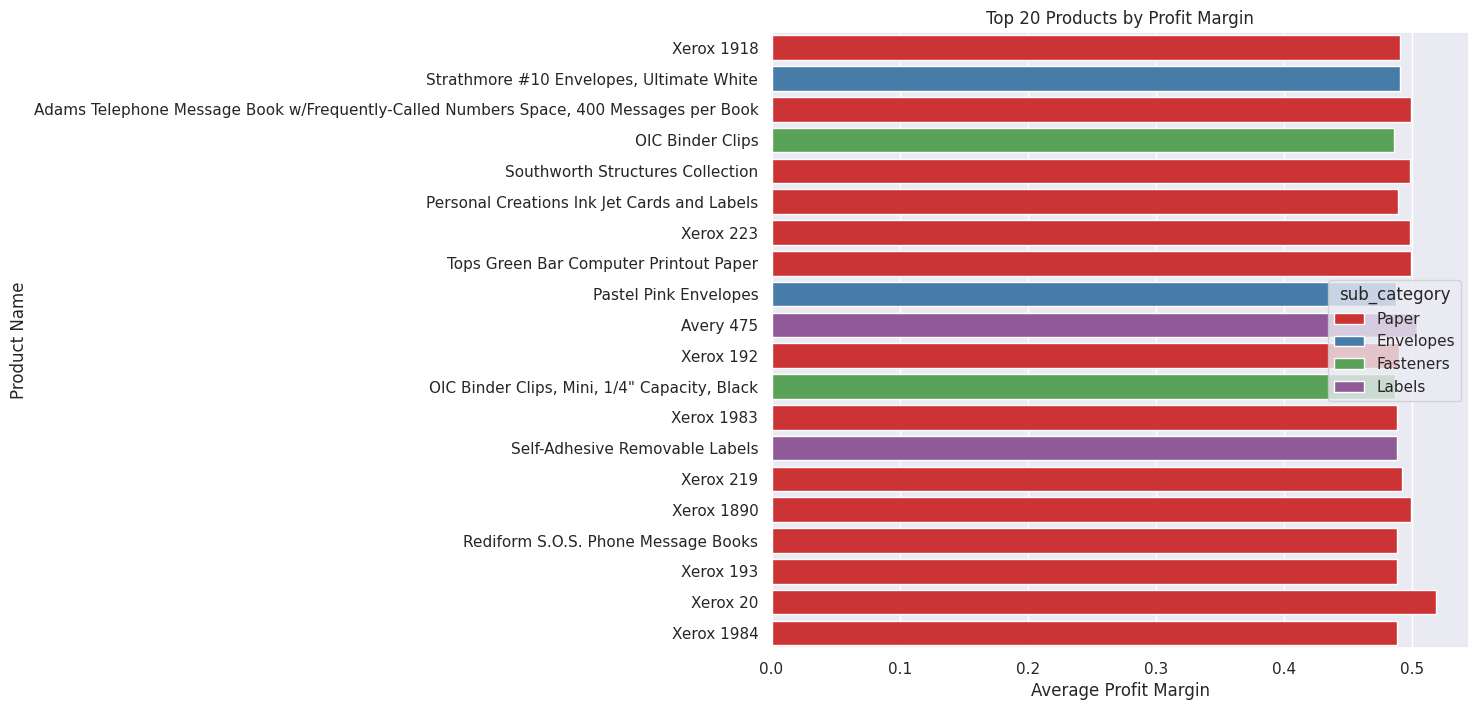

In [381]:
top_profit_margin = (df.groupby('product_name')['profit_margin'].mean().nlargest(20).reset_index())

# Merge back with the original data to retain 'sub_category' for hue
top_products = df[df['product_name'].isin(top_profit_margin['product_name'])]

plt.figure(figsize=(9, 8))
sns.barplot(y='product_name', x='profit_margin', data=top_products, hue='sub_category', errorbar=None, palette='Set1')
plt.title('Top 20 Products by Profit Margin')
plt.xlabel('Average Profit Margin')
plt.ylabel('Product Name')
plt.show()

Most of the products with the best margin are Xerox machines.

#Markets

Sales/profit/profit-margin per market?

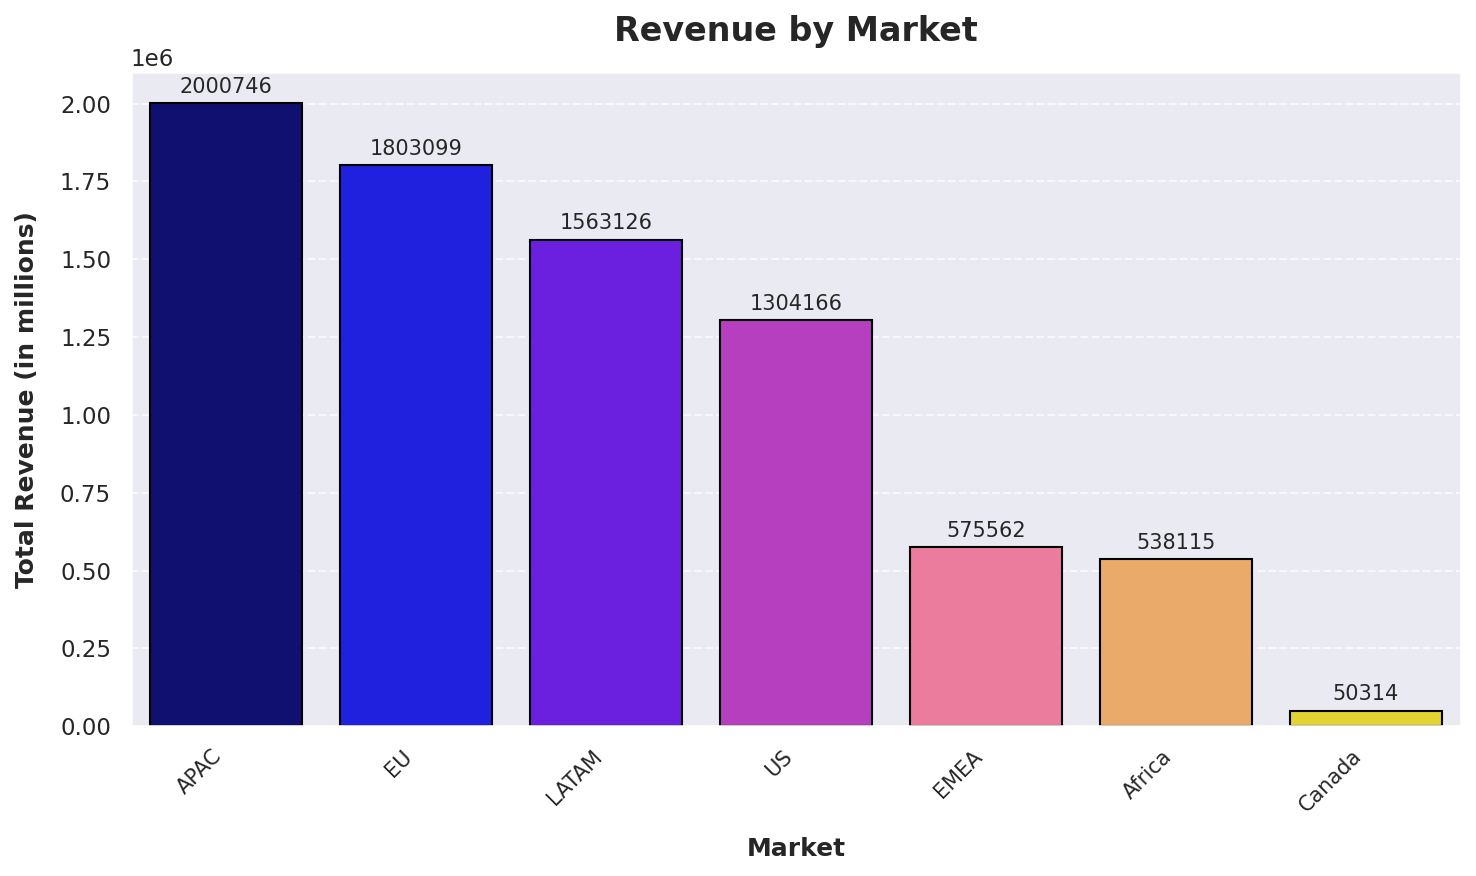

In [382]:
ranked_market_sales = (df.groupby('market')['sales'].sum().sort_values(ascending=False).reset_index())


plt.figure(figsize=(10, 6), dpi=150)
ax = sns.barplot(x='market',y='sales',data=ranked_market_sales,palette='gnuplot2',edgecolor='black', hue='market')

ax.set_title('Revenue by Market', fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Market', fontsize=12, weight='bold', labelpad=10)
ax.set_ylabel('Total Revenue (in millions)', fontsize=12, weight='bold', labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=10)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10, label_type='edge', padding=3)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

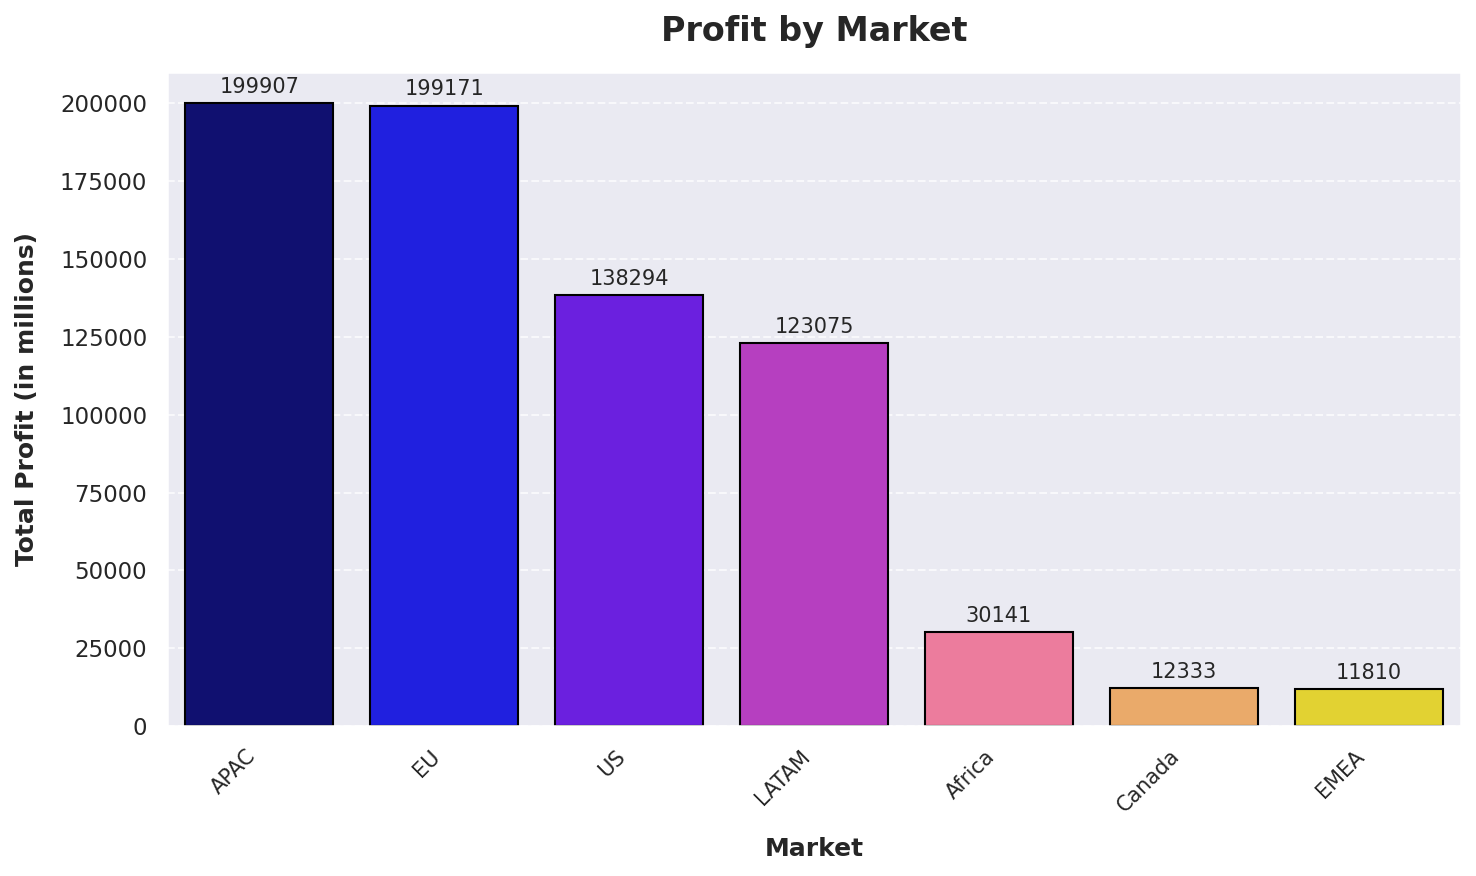

In [383]:
ranked_market_profit = df.groupby('market')['profit'].sum().sort_values(ascending=False).reset_index()

sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 6), dpi=150)

ax = sns.barplot(x='market', y='profit', data=ranked_market_profit, palette='gnuplot2', edgecolor='black', hue='market')

ax.set_title('Profit by Market', fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Market', fontsize=12, weight='bold', labelpad=10)
ax.set_ylabel('Total Profit (in millions)', fontsize=12, weight='bold', labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=10)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10, label_type='edge', padding=3)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

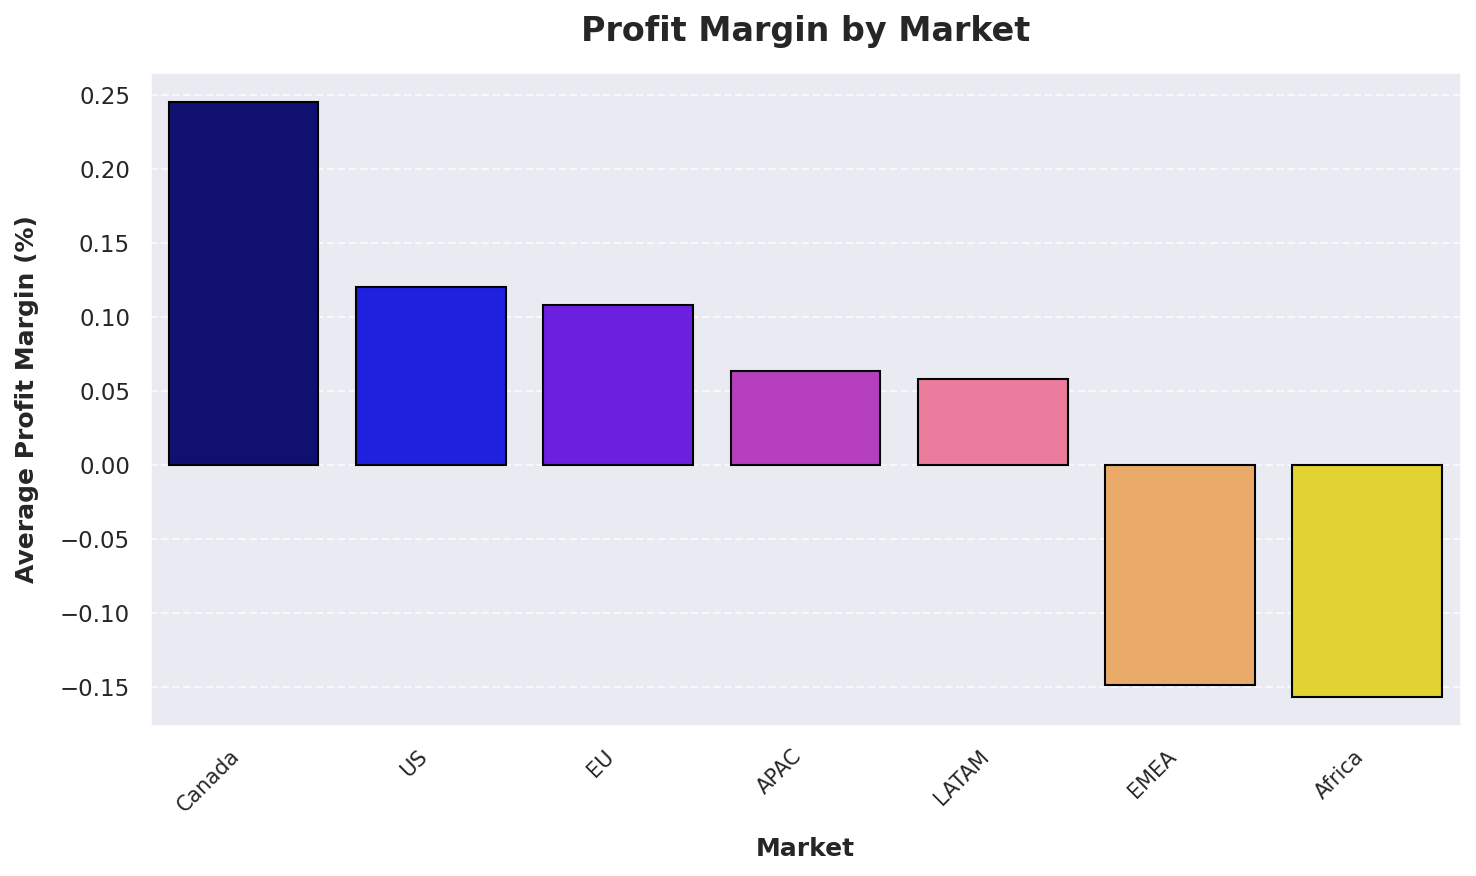

In [384]:
ranked_market_margin = (df.groupby('market')['profit_margin'].mean().sort_values(ascending=False).reset_index())

plt.figure(figsize=(10, 6), dpi=150)
ax = sns.barplot(x='market', y='profit_margin', data=ranked_market_margin, palette='gnuplot2', edgecolor='black', hue='market')

ax.set_title('Profit Margin by Market', fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Market', fontsize=12, weight='bold', labelpad=10)
ax.set_ylabel('Average Profit Margin (%)', fontsize=12, weight='bold', labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Canada. Despite being the smallest market, has the highest average profit margin.

This may be due to factors such as consumption habits, economic development level, and competition in different regions. Canada may have more high-end consumers, while other markets may have more discount promotions, resulting in lower unit prices. Additionally, competition in different regions may vary wildly, which can also affect sales and profit margins.

EMEA and Africa have a negative average profit margin but are still profitable (as we see above). Lets explore a little further.


Text(0, 0.5, 'Profit')

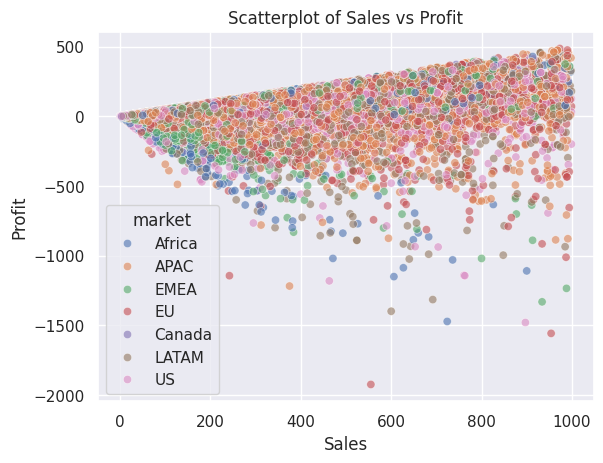

In [385]:
sns.scatterplot(x='sales', y='profit', data=df, hue='market', color='Set1', alpha=0.6)

plt.title('Scatterplot of Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

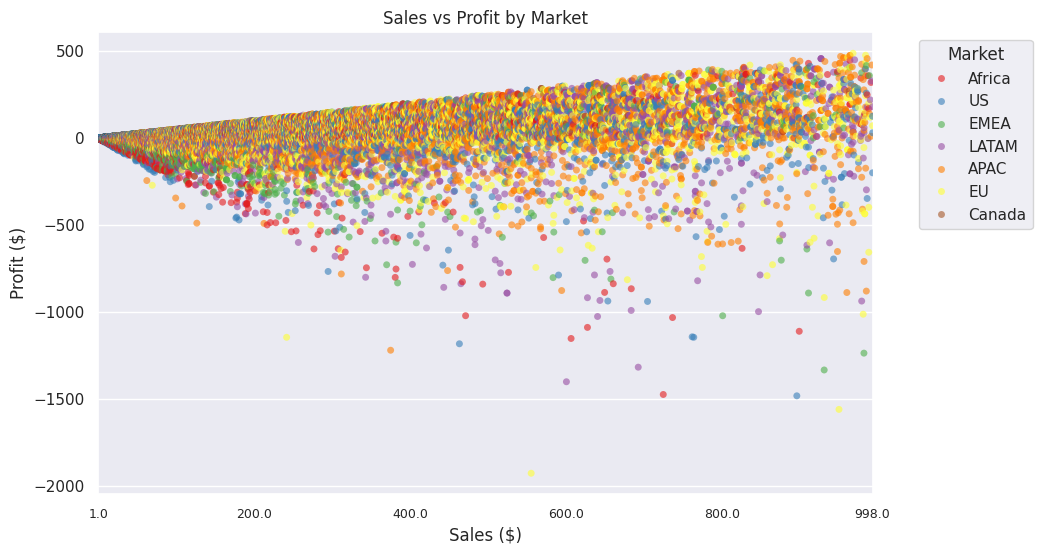

In [386]:
#tried using stripplot to better visualize clusters of Africa and EMEA markets
plt.figure(figsize=(10, 6))
sns.stripplot(x='sales', y='profit', data=df, hue='market', alpha=0.6, palette='Set1')

plt.title('Sales vs Profit by Market')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.xticks(ticks=[0, 199, 399, 599, 799, 990], fontsize=9) #xticks were being stubborn and these values worked
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

It is possible that the Africa and EMEA purchases clustered in the negative profit area are throwing off the calculation for their average profit margin. Especially since they are the smallest market along with Canada.

##Region

What regions bring the most revenue?

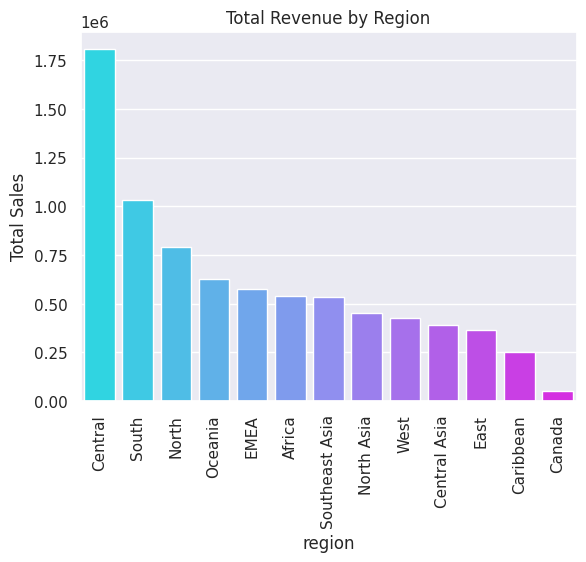

In [387]:
ranked_region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False).reset_index()

sns.barplot(x='region', y='sales', data=ranked_region_sales, estimator=sum, hue='region', palette='cool', order=ranked_region_sales['region'])

plt.title('Total Revenue by Region')
plt.xlabel('region')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='center')
plt.show()

What is our most profitable region?

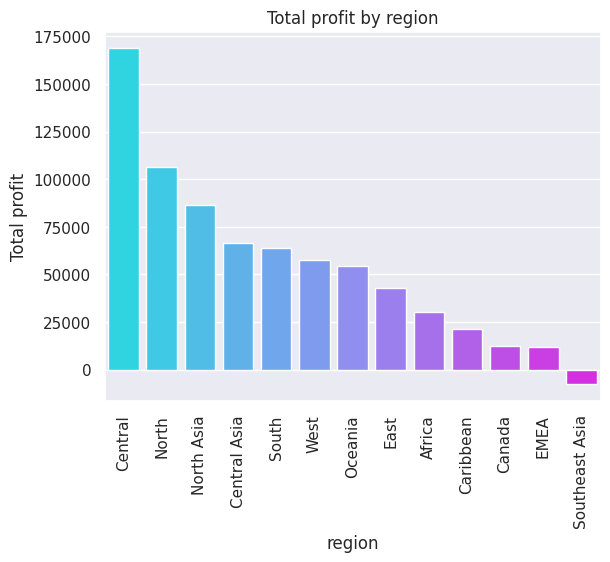

In [388]:
ranked_region_profit = df.groupby('region')['profit'].sum().sort_values(ascending=False).reset_index()

sns.barplot(x='region', y='profit', data=ranked_region_profit, estimator=sum, hue='region', palette='cool', order=ranked_region_profit['region'])

plt.title('Total profit by region')
plt.xlabel('region')
plt.ylabel('Total profit')
plt.xticks(rotation=90, ha='center')
plt.show()

Southeast asia is the median in market sizes but brings negative profit.

Central, South, East, West, and North are some of the biggest regions. Do these correspond to regions in the US?

In [389]:
df[df['region']=='North'].head(10)

order_id order_date  ship_date       ship_mode      customer_name  \
3    IT-2011-3647632 2011-01-01 2011-05-01    Second Class       Eugene Moren   
12   ES-2011-4869686 2011-03-01 2011-07-01  Standard Class  Dorothy Dickinson   
28    MX-2011-140641 2011-04-01 2011-09-01  Standard Class        Maya Herman   
32    MX-2011-140641 2011-04-01 2011-09-01  Standard Class        Maya Herman   
37   IT-2011-2942451 2011-04-01 2011-09-01  Standard Class     Grant Thornton   
40   IT-2011-2942451 2011-04-01 2011-09-01  Standard Class     Grant Thornton   
110  IT-2011-3659171 2011-10-01 2011-01-14  Standard Class       Greg Guthrie   
112   MX-2011-140697 2011-10-01 2011-01-15  Standard Class     Paul MacIntyre   
123   MX-2011-140697 2011-10-01 2011-01-15  Standard Class     Paul MacIntyre   
127   US-2011-163874 2011-11-01 2011-12-01     First Class         Philip Fox   

         segment      state         country market region  ...  sales  \
3    Home Office  Stockholm          Sweden     EU  North  ...   45.0   
12      Consumer    England  United Kingdom     EU  North  ...  854.0   
28     Corporate    Yucatán          Mexico  LATAM  North  ...  223.0   
32     Corporate    Yucatán          Mexico  LATAM  North  ...  166.0   
37     Corporate    England  United Kingdom     EU  North  ...   27.0   
40     Corporate    England  United Kingdom     EU  North  ...   17.0   
110    Corporate    England  United Kingdom     EU  North  ...  206.0   
112     Consumer     México          Mexico  LATAM  North  ...  114.0   
123     Consumer     México          Mexico  LATAM  North  ...   16.0   
127     Consumer     México          Mexico  LATAM  North  ...  452.0   

    quantity discount     profit  shipping_cost  order_priority  year  \
3          3    0.500  -26.05500           4.82            High  2011   
12         7    0.000  290.43000          12.56          Medium  2011   
28         4    0.000   13.28000          42.28            High  2011   
32         2    0.002   49.42824           9.54            High  2011   
37         2    0.500  -21.90000           2.11          Medium  2011   
40         2    0.500   -1.05000           0.90          Medium  2011   
110        3    0.500  -41.26500          14.65          Medium  2011   
112        3    0.000   56.88000           8.93          Medium  2011   
123        1    0.000    1.76000           0.89          Medium  2011   
127        5    0.200 -107.30000          57.75          Medium  2011   

     order_month  profit_margin lead_time  
3        January      -0.579000       120  
12         March       0.340082       122  
28         April       0.059552       153  
32         April       0.297760       153  
37         April      -0.811111       153  
40         April      -0.061765       153  
110      October      -0.200316      -260  
112      October       0.498947      -259  
123      October       0.110000      -259  
127     November      -0.237389        30  

[10 rows x 24 columns]

Looks like region corresponds to regions within markets. Not regions within countries since Stockholm is not in the northern region of sweden but sweden is in the northern region of the EU. Likewise Yucatan is not in the north of mexico but mexico is in the north of latin america (LATAM). I do not think the region feature is very useful.

##Countries

Lets look into countries

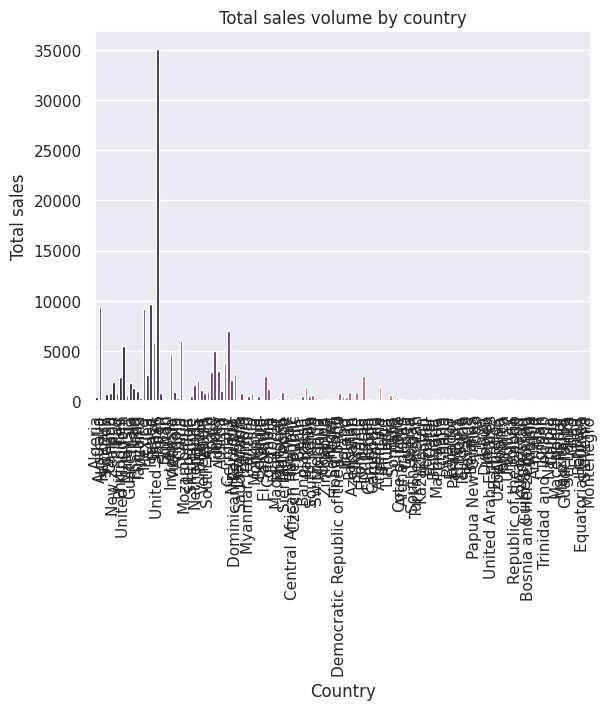

In [390]:
sns.barplot(x='country', y='quantity', data=df, estimator=sum, errorbar=None, hue='country', palette='inferno')
plt.title('Total sales volume by country')
plt.xlabel('Country')
plt.ylabel('Total sales')
plt.xticks(rotation=90, ha='center')
plt.show()

Lets do just top 20

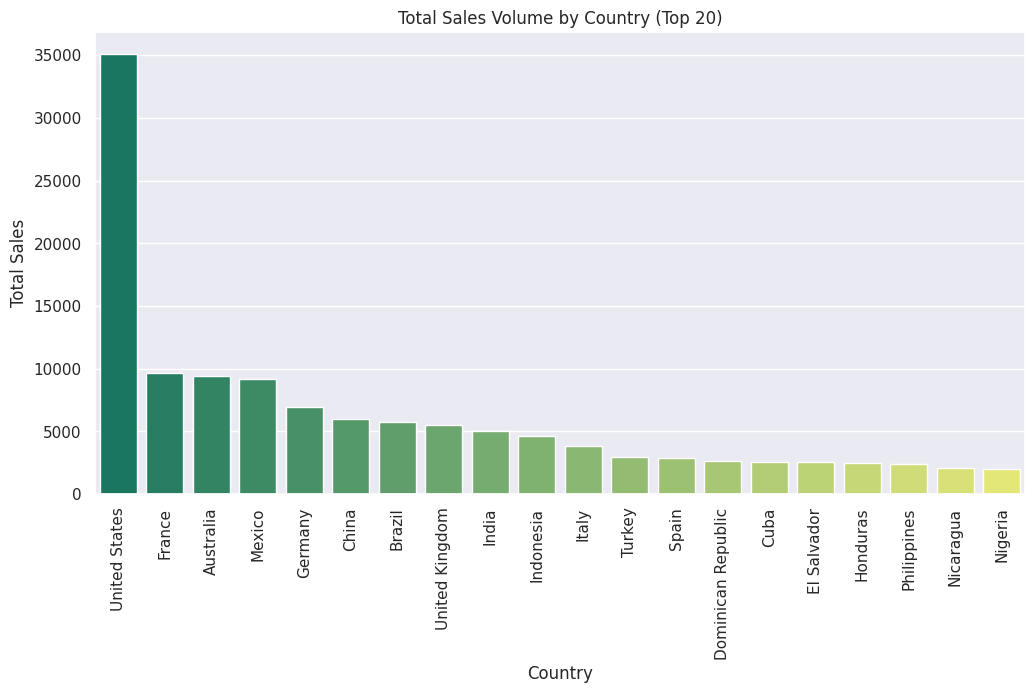

In [391]:
country_sales = df.groupby('country')['quantity'].sum().nlargest(20).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='quantity', data=country_sales, hue='country', palette='summer')
plt.title('Total Sales Volume by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='center')
plt.show()

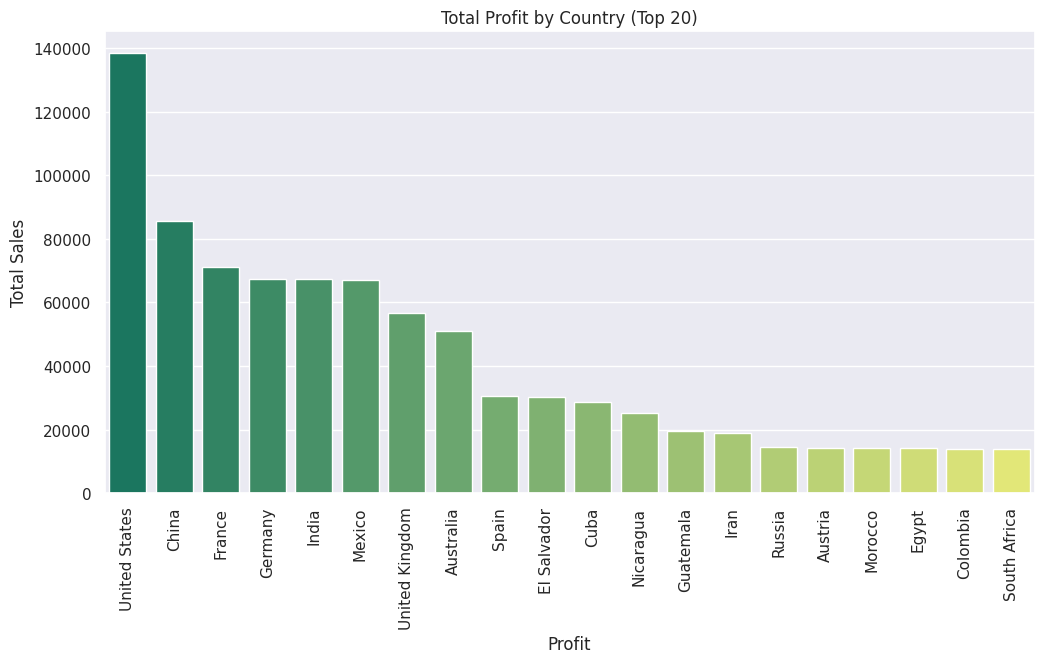

In [392]:
country_profit = df.groupby('country')['profit'].sum().nlargest(20).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='profit', data=country_profit, hue='country', palette='summer')
plt.title('Total Profit by Country (Top 20)')
plt.xlabel('Profit')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='center')
plt.show()

The US is our largest market. Lets look into states within the US

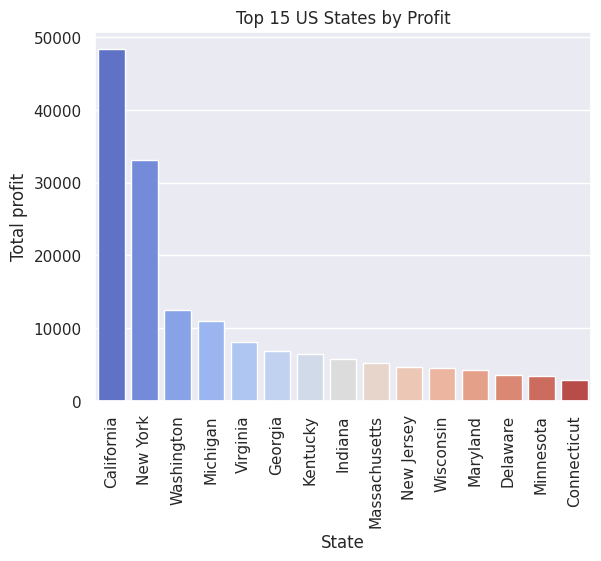

In [393]:
usa_data = df[df['country'] == 'United States']
state_sales = usa_data.groupby('state')['profit'].sum().nlargest(15).reset_index()

sns.barplot(x='state', y='profit', data=state_sales, hue='state', palette='coolwarm')
plt.title('Top 15 US States by Profit')
plt.xlabel('State')
plt.ylabel('Total profit')
plt.xticks(rotation=90, ha='center')
plt.show()

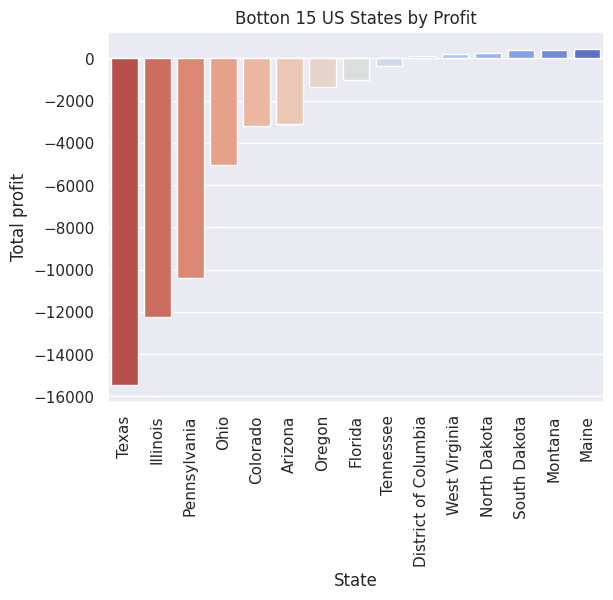

In [394]:
usa_data = df[df['country'] == 'United States']
state_sales = usa_data.groupby('state')['profit'].sum().nsmallest(15).reset_index()
sns.barplot(x='state', y='profit', data=state_sales, hue='state',palette='coolwarm_r')
plt.title('Botton 15 US States by Profit')
plt.xlabel('State')
plt.ylabel('Total profit')
plt.xticks(rotation=90, ha='center')
plt.show()

Very surprising that Texas operates at such a big loss. There could be a lot of competition in that state. Worth researching furthur.

Lets see relative size of markets of all states in all countries

In [395]:
state_sales = df[['country','state','sales']].groupby(['country','state'])['sales'].sum().reset_index()
fig = px.treemap(state_sales,path=['country','state'], values='sales')
fig.update_layout(height=1000,title='State-wise Sales',)

##Shipping Cost vs Shipping Mode

In [396]:
df['ship_mode'].value_counts()

ship_mode
Standard Class    29201
Second Class       9789
First Class        7121
Same Day           2548
Name: count, dtype: int64

Are the various expedited shipping modes worth the cost?

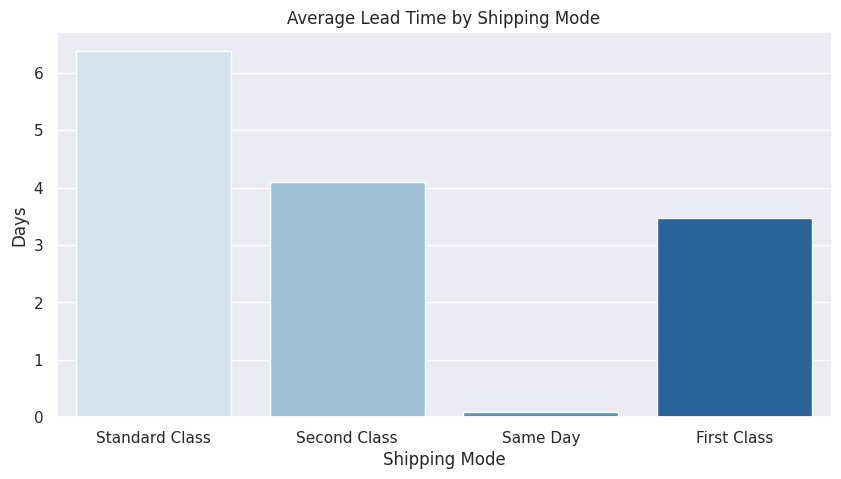

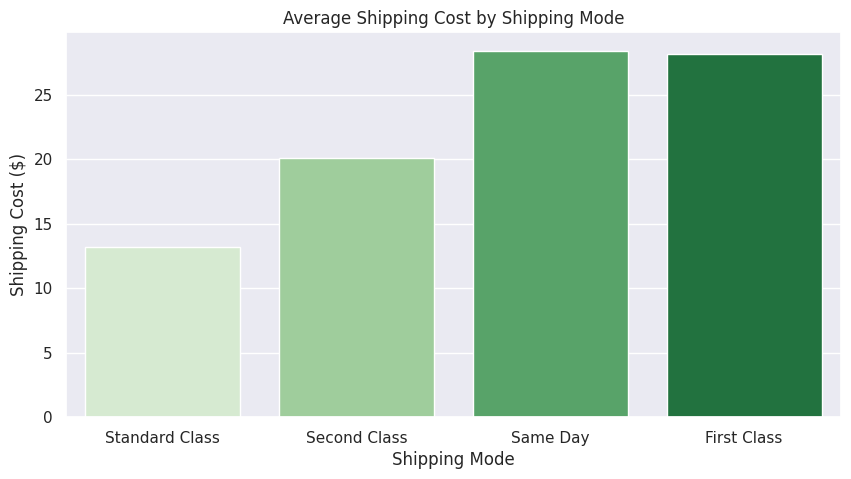

In [397]:
plt.figure(figsize=(10, 5))
sns.barplot(x='ship_mode', y='lead_time', data=df, errorbar=None, hue='ship_mode', palette='Blues')
plt.title('Average Lead Time by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Days')
plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(x='ship_mode', y='shipping_cost', data=df, errorbar=None, hue='ship_mode', palette='Greens')
plt.title('Average Shipping Cost by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Shipping Cost ($)')
plt.show()

The relationship between lead time and shipping cost makes sense except for the fact that same day and first class shipping cost the same. Either the shipping service overcharges for first class shipping or same day shipping is not offered everywhere since this is a GLOBAL superstore.

Lets look at the countries that order same day vs first class shipping.

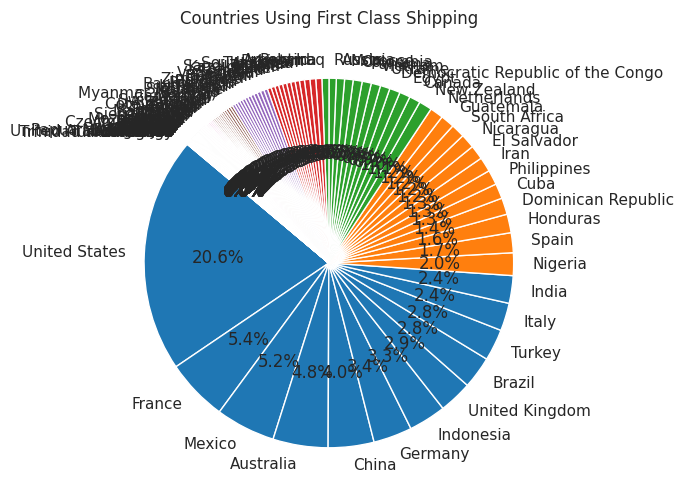

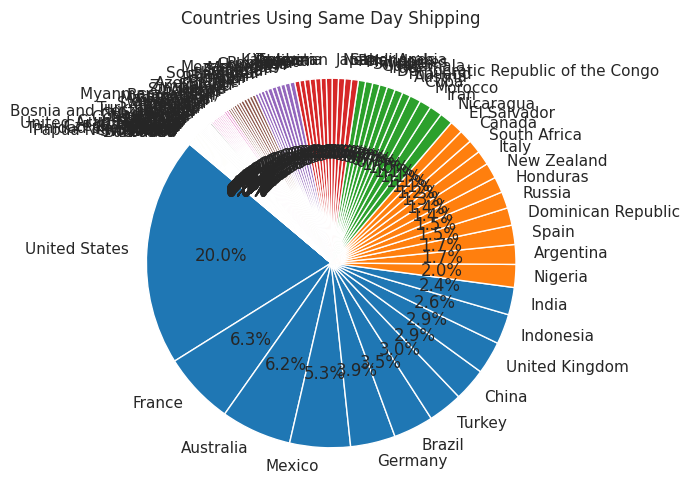

In [398]:
first_class_data = df[df['ship_mode'] == 'First Class']['country'].value_counts()

same_day_data = df[df['ship_mode'] == 'Same Day']['country'].value_counts()

plt.figure(figsize=(8, 6))
first_class_data.plot.pie(autopct='%1.1f%%', startangle=140, title='Countries Using First Class Shipping', ylabel='', colormap='tab10')
plt.show()

plt.figure(figsize=(8, 6))
same_day_data.plot.pie(autopct='%1.1f%%', startangle=140, title='Countries Using Same Day Shipping', ylabel='', colormap='tab10')
plt.show()

Very similar breakdown. It appears same day shipping is in fact available in most if not all countrues where first class shipping is available. The company should investigate further with the intention of renegotiating rates with its shipping partners.

In [399]:
contingency_table = pd.crosstab(df['order_priority'], df['ship_mode'])
print(contingency_table)

ship_mode       First Class  Same Day  Second Class  Standard Class
order_priority                                                     
Critical               1642       700          1369               0
High                   3247      1194          3820            6436
Low                       0         0             0            2318
Medium                 2232       654          4600           20447


In [400]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between order_priority and ship_mode.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between order_priority and ship_mode.")

Chi-Square Statistic: 11803.391522710175
P-Value: 0.0
Degrees of Freedom: 9
Expected Frequencies Table:
 [[  543.08619166   194.32433877   746.56238312  2227.02708646]
 [ 2150.83205573   769.59978627  2956.6767299   8819.8914281 ]
 [  339.22764545   121.38071066   466.3248731   1391.06677079]
 [ 4087.85410715  1462.69516431  5619.43601389 16763.01471465]]
Reject the null hypothesis: There is a significant relationship between order_priority and ship_mode.


For the purpose of this this analysis, order priority can be treated the same as ship mode

##Performance Over Time

In [401]:
print('The most recent Order Date is:',df['order_date'].max())
print('The first Order Date is:',df['order_date'].min())

The most recent Order Date is: 2014-12-31 00:00:00
The first Order Date is: 2011-01-01 00:00:00


The data contains sales over the course of 4 years

In [402]:
#for scatterplots
df_time = df[['order_date', 'segment', 'category', 'market', 'sales', 'quantity', 'profit']].copy()
df_time['Month'] = df_time['order_date'].dt.month
df_time['Year'] = df_time['order_date'].dt.year

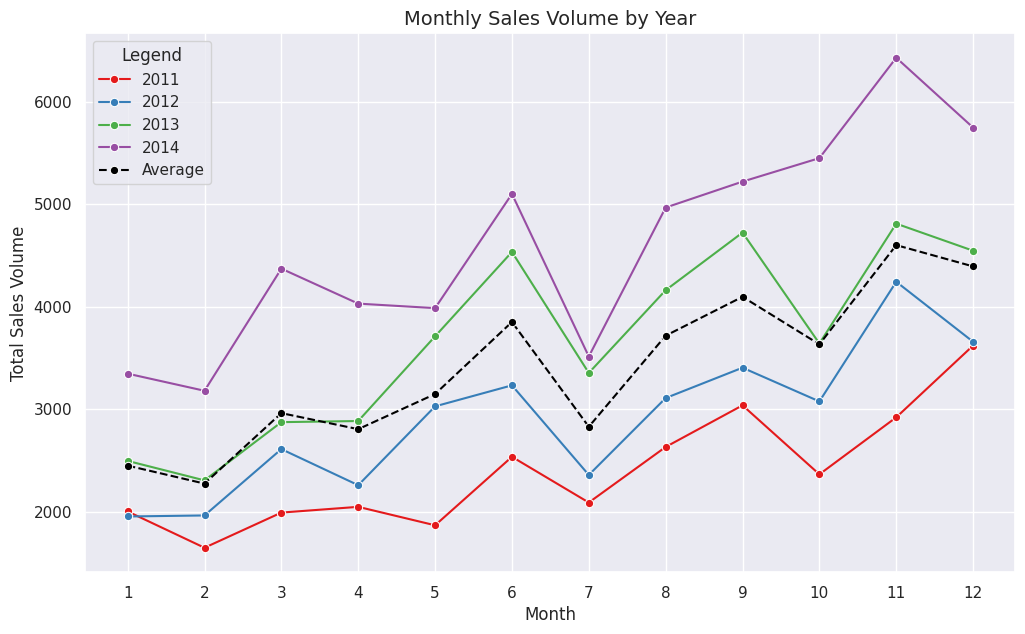

In [403]:
monthly_volume = df_time.groupby(['Year', 'Month'])['quantity'].sum().reset_index()
avg_monthly_volume = monthly_volume.groupby('Month')['quantity'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.lineplot(data=monthly_volume, x='Month', y='quantity', hue='Year', marker='o', palette='Set1')
sns.lineplot(data=avg_monthly_volume, x='Month', y='quantity', label='Average', color='black', linestyle='--', marker='o')
plt.title('Monthly Sales Volume by Year', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales Volume', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Legend')
plt.show()

Consistent growth year after year.

Predictable seasonality. Dip in July and October with peak in November.

Adjust sales strategies: Generally speaking, the traditional sales peak seasons in the United States include Thanksgiving, Christmas and New Year holidays. For the off-season, the company can consider adopting promotional strategies, such as providing discounts, gifts, etc., to promote sales. In addition, sales strategies can be adjusted to balance sales between off-season and peak seasons, such as launching new products during the off-season to attract more consumers.

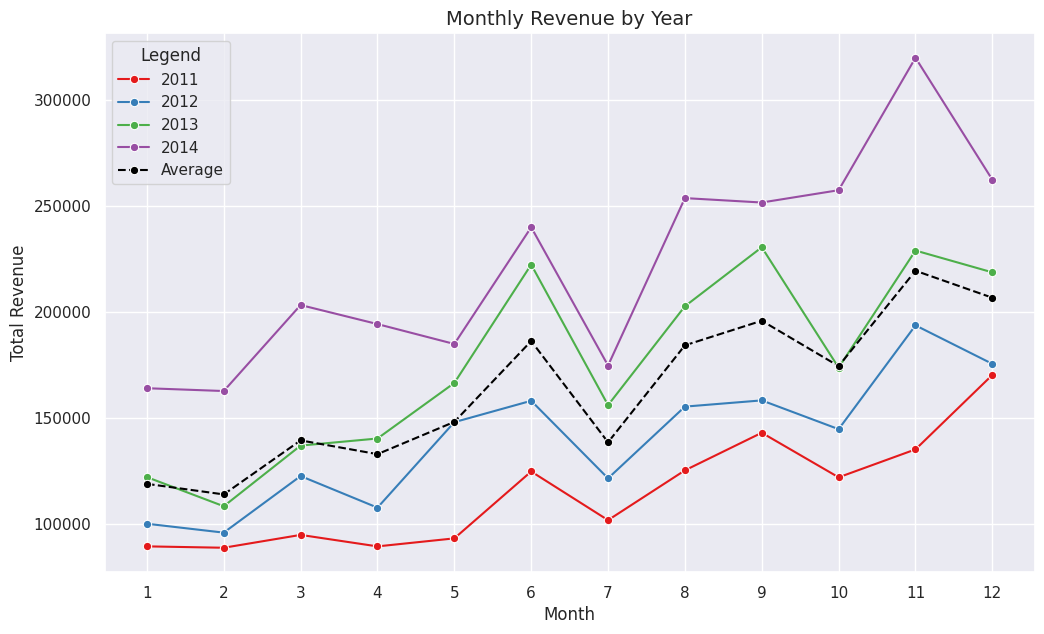

In [404]:
monthly_revenue = df_time.groupby(['Year', 'Month'])['sales'].sum().reset_index()
avg_monthly_revenue = monthly_revenue.groupby('Month')['sales'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.lineplot(data=monthly_revenue, x='Month', y='sales', hue='Year', marker='o', palette='Set1')
sns.lineplot(data=avg_monthly_revenue, x='Month', y='sales', label='Average', color='black', linestyle='--', marker='o')
plt.title('Monthly Revenue by Year', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Legend')
plt.show()

2014 had an incredible holiday season. Even avoiding the usual October dip. More research should be done to look into what caused this success.

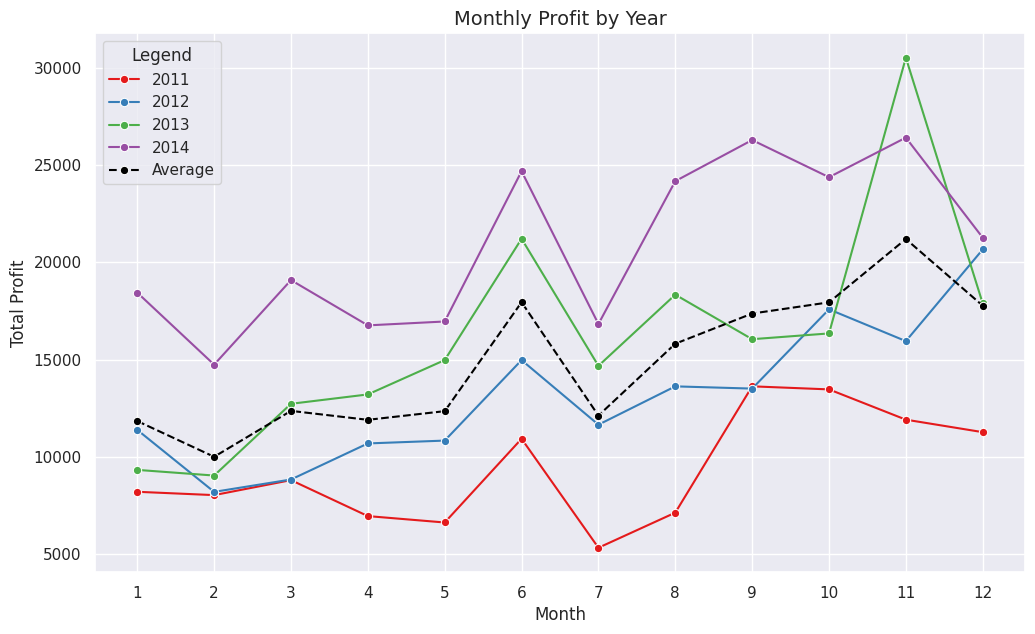

In [405]:
monthly_profit = df_time.groupby(['Year', 'Month'])['profit'].sum().reset_index()
avg_monthly_profit = monthly_profit.groupby('Month')['profit'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.lineplot(data=monthly_profit, x='Month', y='profit', hue='Year', marker='o', palette='Set1')
sns.lineplot(data=avg_monthly_profit, x='Month', y='profit', label='Average', color='black', linestyle='--', marker='o')
plt.title('Monthly Profit by Year', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Legend')
plt.show()

In [406]:
df_time['cost'] = df_time['sales'] - df_time['profit']
df_time['profit_margin'] = df_time['profit'] / df_time['sales']

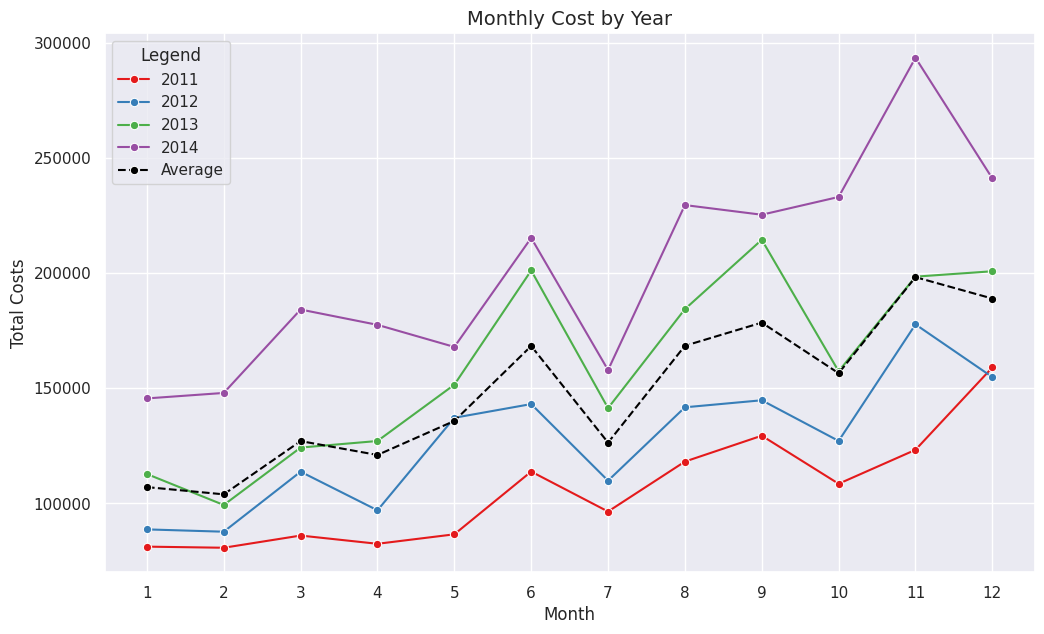

In [407]:
monthly_cost = df_time.groupby(['Year', 'Month'])['cost'].sum().reset_index()
avg_monthly_cost = monthly_cost.groupby('Month')['cost'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.lineplot(data=monthly_cost, x='Month', y='cost', hue='Year', marker='o', palette='Set1')
sns.lineplot(data=avg_monthly_cost, x='Month', y='cost', label='Average', color='black', linestyle='--', marker='o')
plt.title('Monthly Cost by Year', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Costs', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Legend')
plt.show()

The most recent high season was plagued by high costs.

2013 had a record breaking high season due in part to good cost control.

Strengthen cost control: being more careful in the procurement process, managing operating costs, and reasonably controlling inventory, so as to reduce costs and increase profits.

Cost was also low in October 2013 but profit was subpar so this is not the whole story.

Potential Factors:

Increased market competition: More competitors may enter the market, leading to price competition and reduced profit rate.

Product Pricing Strategy: The company's product pricing strategy may need to be adjusted to make it more consistent with market demand while maintaining reasonable profit rate.



In [408]:
annual_revenue = df.groupby('year')['sales'].sum().reset_index()

annual_revenue['GrowthRate'] = annual_revenue['sales'].pct_change() * 100
print(annual_revenue)

   year      sales  GrowthRate
0  2011  1378151.0         NaN
1  2012  1681499.0   22.011231
2  2013  2107021.0   25.306111
3  2014  2668457.0   26.645961


Average yearly growth rate of 24.6%.

Revenue has nearly doubled from start to end of data collection.

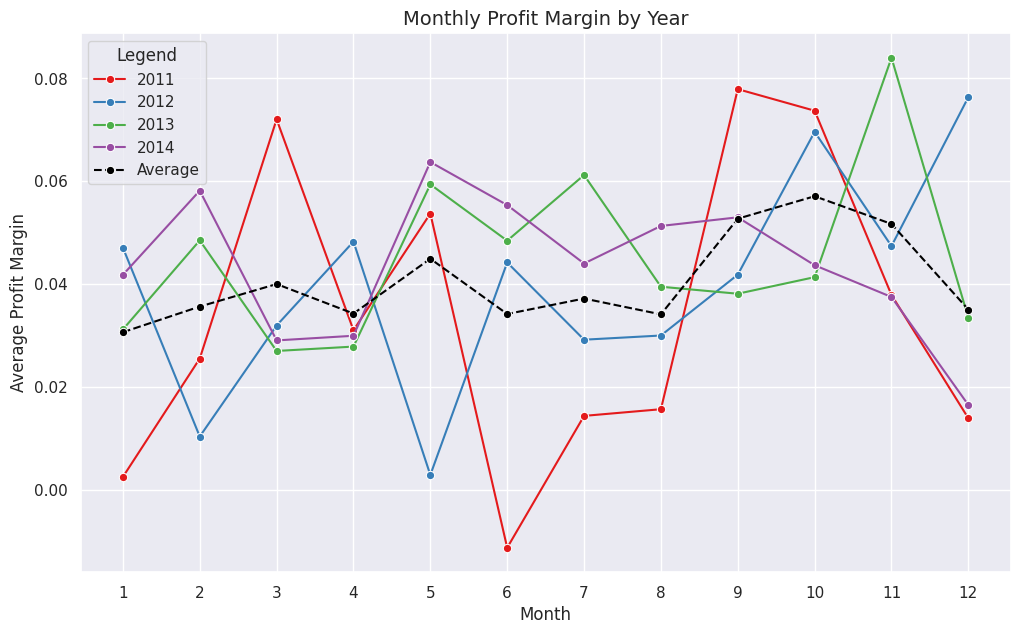

In [409]:
monthly_profit_margin = df_time.groupby(['Year', 'Month'])['profit_margin'].mean().reset_index()
avg_monthly_profit_margin = monthly_profit_margin.groupby('Month')['profit_margin'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.lineplot(data=monthly_profit_margin, x='Month', y='profit_margin', hue='Year', marker='o', palette='Set1')
sns.lineplot(data=avg_monthly_profit_margin, x='Month', y='profit_margin', label='Average', color='black', linestyle='--', marker='o')
plt.title('Monthly Profit Margin by Year', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Profit Margin', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Legend')
plt.show()

Margins were very bad during the most recent holiday season.

###Customer Segments

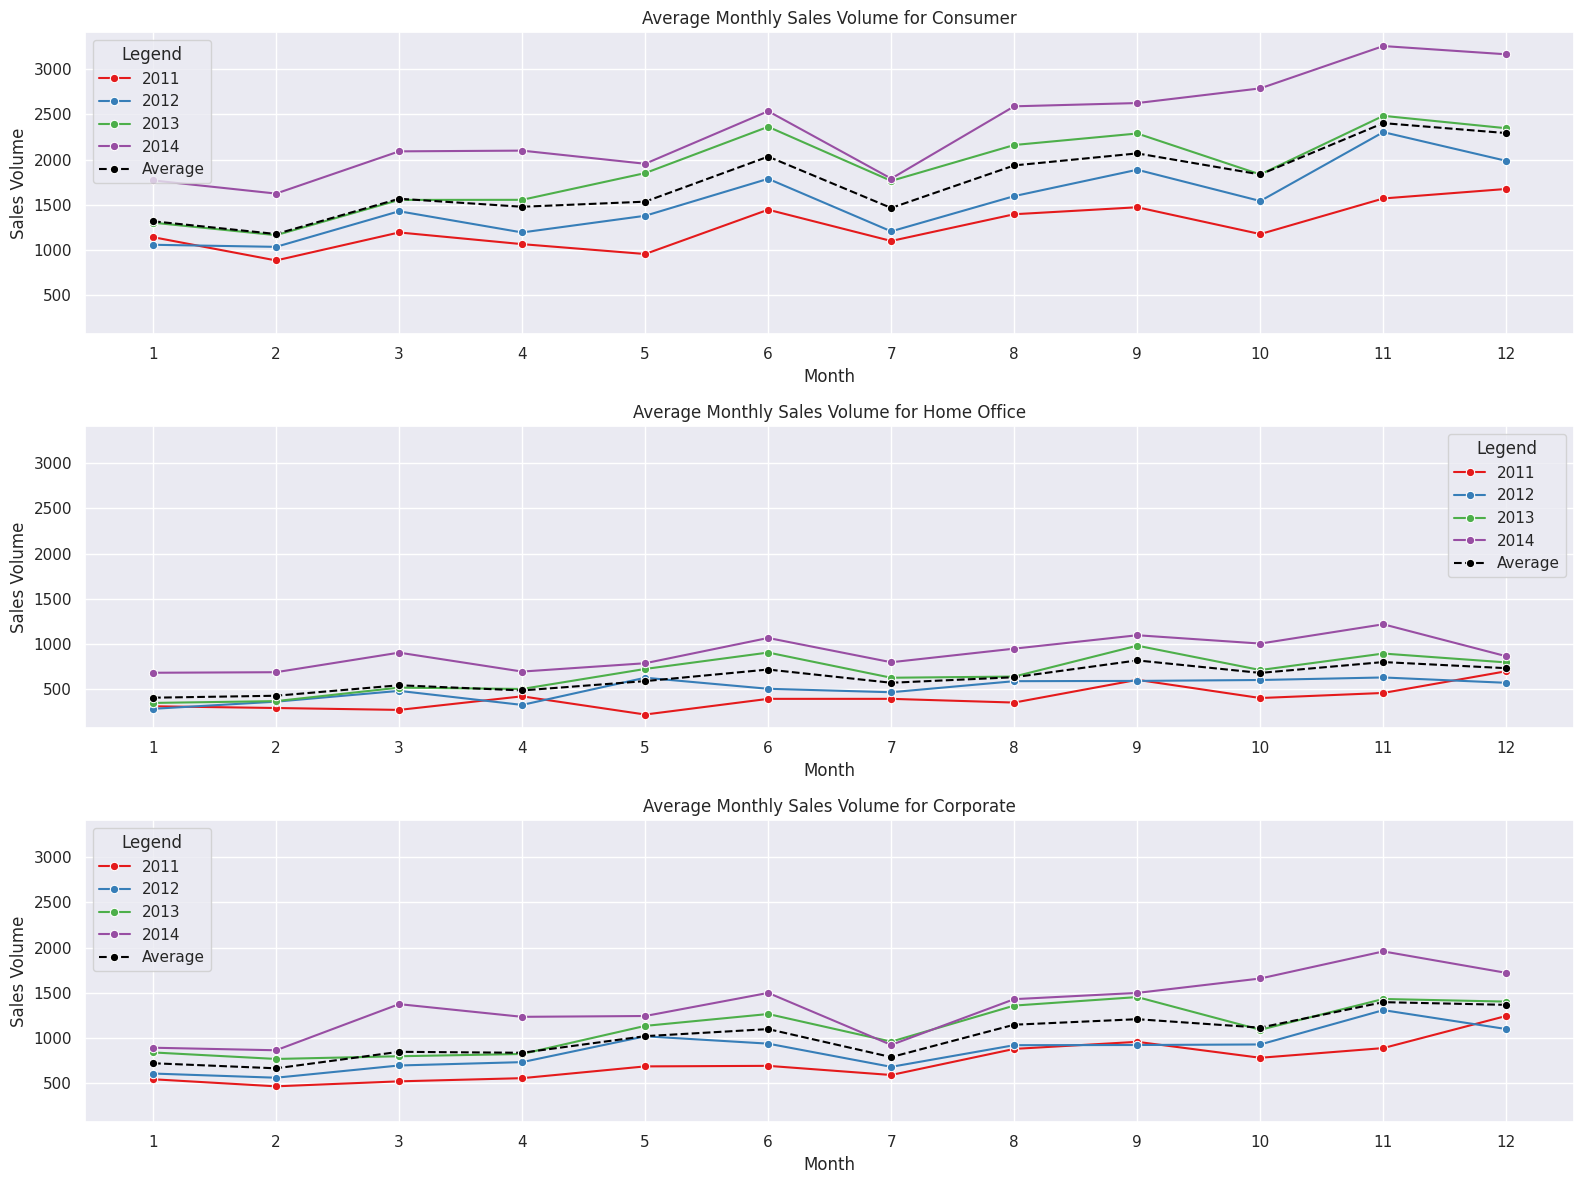

In [410]:

segments = df_time['segment'].unique()

fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharey=True)
axes = axes.flatten()

for i in range(3):
    monthly_volume = (df_time[df_time['segment'] == segments[i]].groupby(['Year', 'Month'])['quantity'].sum().reset_index())

    avg_monthly_volume = (monthly_volume.groupby('Month')['quantity'].mean().reset_index())

    sns.lineplot(data=monthly_volume, x='Month', y='quantity', hue='Year', marker='o', palette='Set1', ax=axes[i])

    sns.lineplot(data=avg_monthly_volume, x='Month', y='quantity', label='Average', color='black', linestyle='--', marker='o', ax=axes[i])

    axes[i].set_title(f'Average Monthly Sales Volume for {segments[i]}')
    axes[i].set_ylabel('Sales Volume')
    axes[i].set_xlabel('Month')
    axes[i].set_xticks(range(1, 13))
    axes[i].grid(True)
    axes[i].legend(title='Legend')

plt.tight_layout()
plt.show()

No surprises here. Each segment shows a steady increase in sales volume year after year.

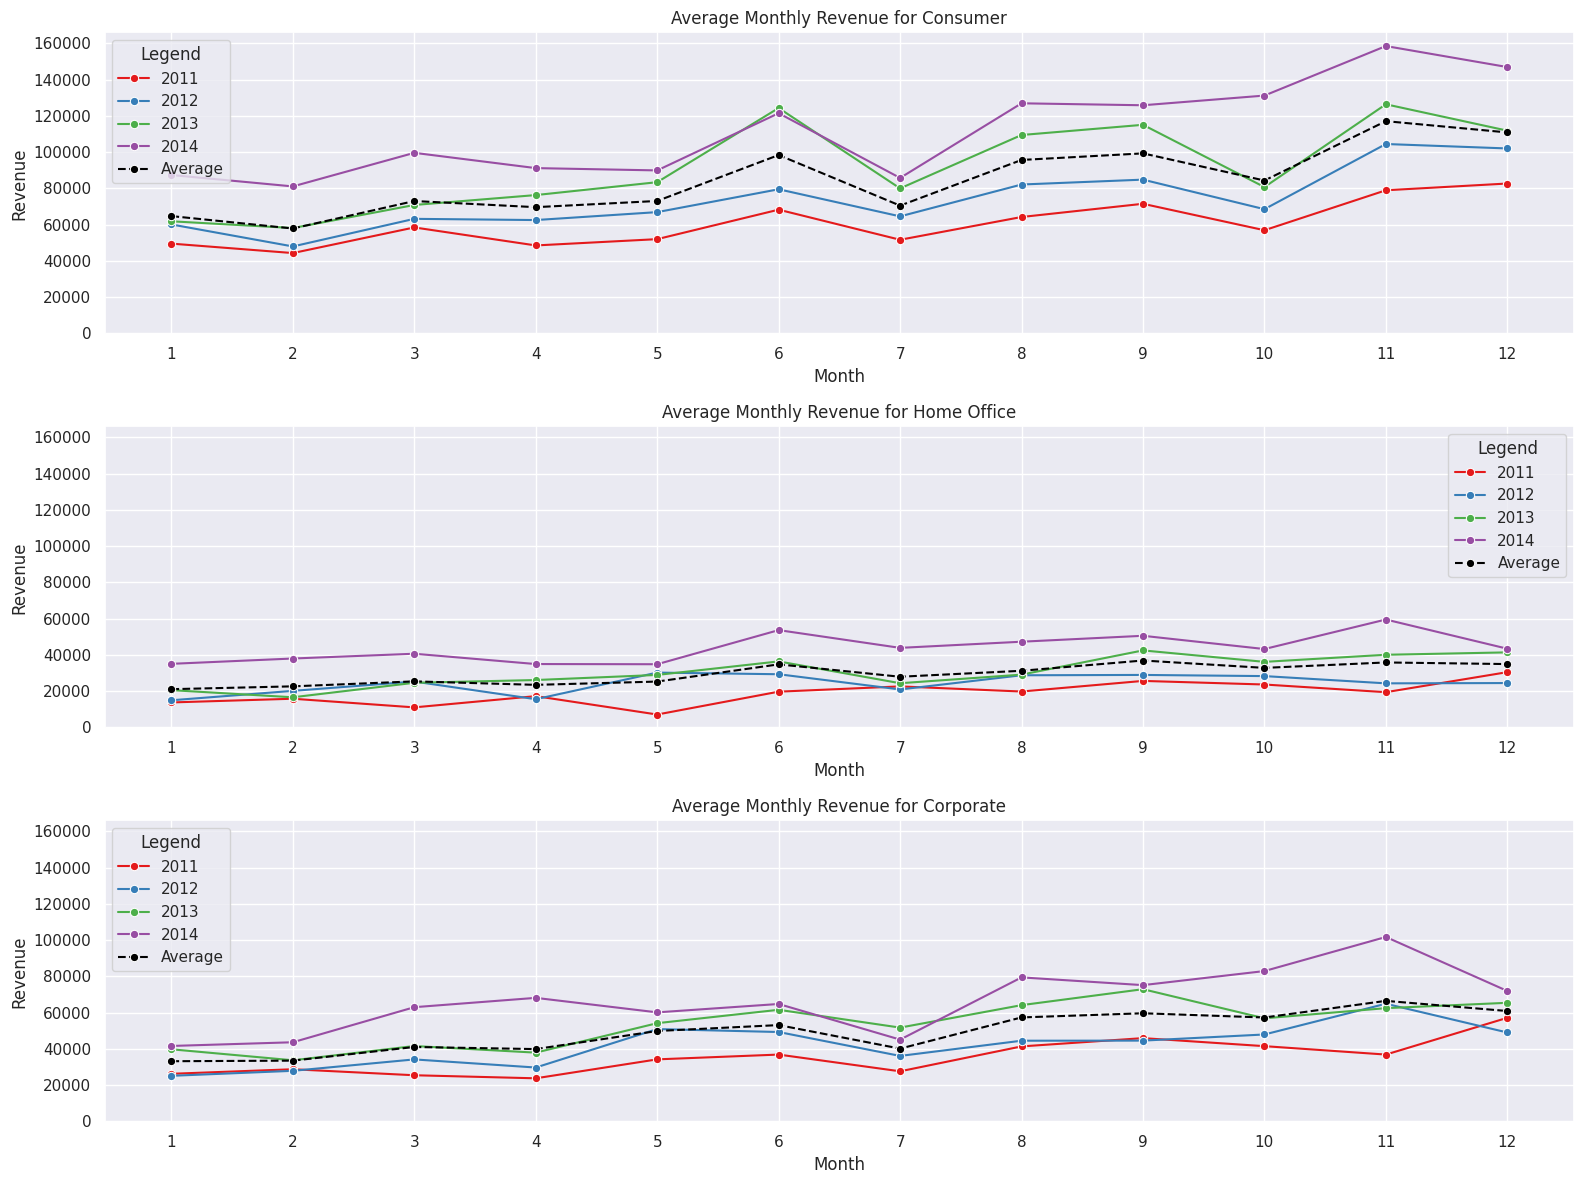

In [411]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharey=True)
axes = axes.flatten()

for i in range(3):
    monthly_revenue = (df_time[df_time['segment'] == segments[i]].groupby(['Year', 'Month'])['sales'].sum().reset_index())

    avg_monthly_revenue = (monthly_revenue.groupby('Month')['sales'].mean().reset_index())

    sns.lineplot(data=monthly_revenue,x='Month',y='sales',hue='Year',marker='o',palette='Set1',ax=axes[i])

    sns.lineplot(data=avg_monthly_revenue,x='Month',y='sales',label='Average',color='black',linestyle='--',marker='o',ax=axes[i])

    axes[i].set_title(f'Average Monthly Revenue for {segments[i]}')
    axes[i].set_ylabel('Revenue')
    axes[i].set_xlabel('Month')
    axes[i].set_xticks(range(1, 13))
    axes[i].grid(True)
    axes[i].legend(title='Legend')

plt.tight_layout()
plt.show()

The consumer segment has been growing the most year after year.

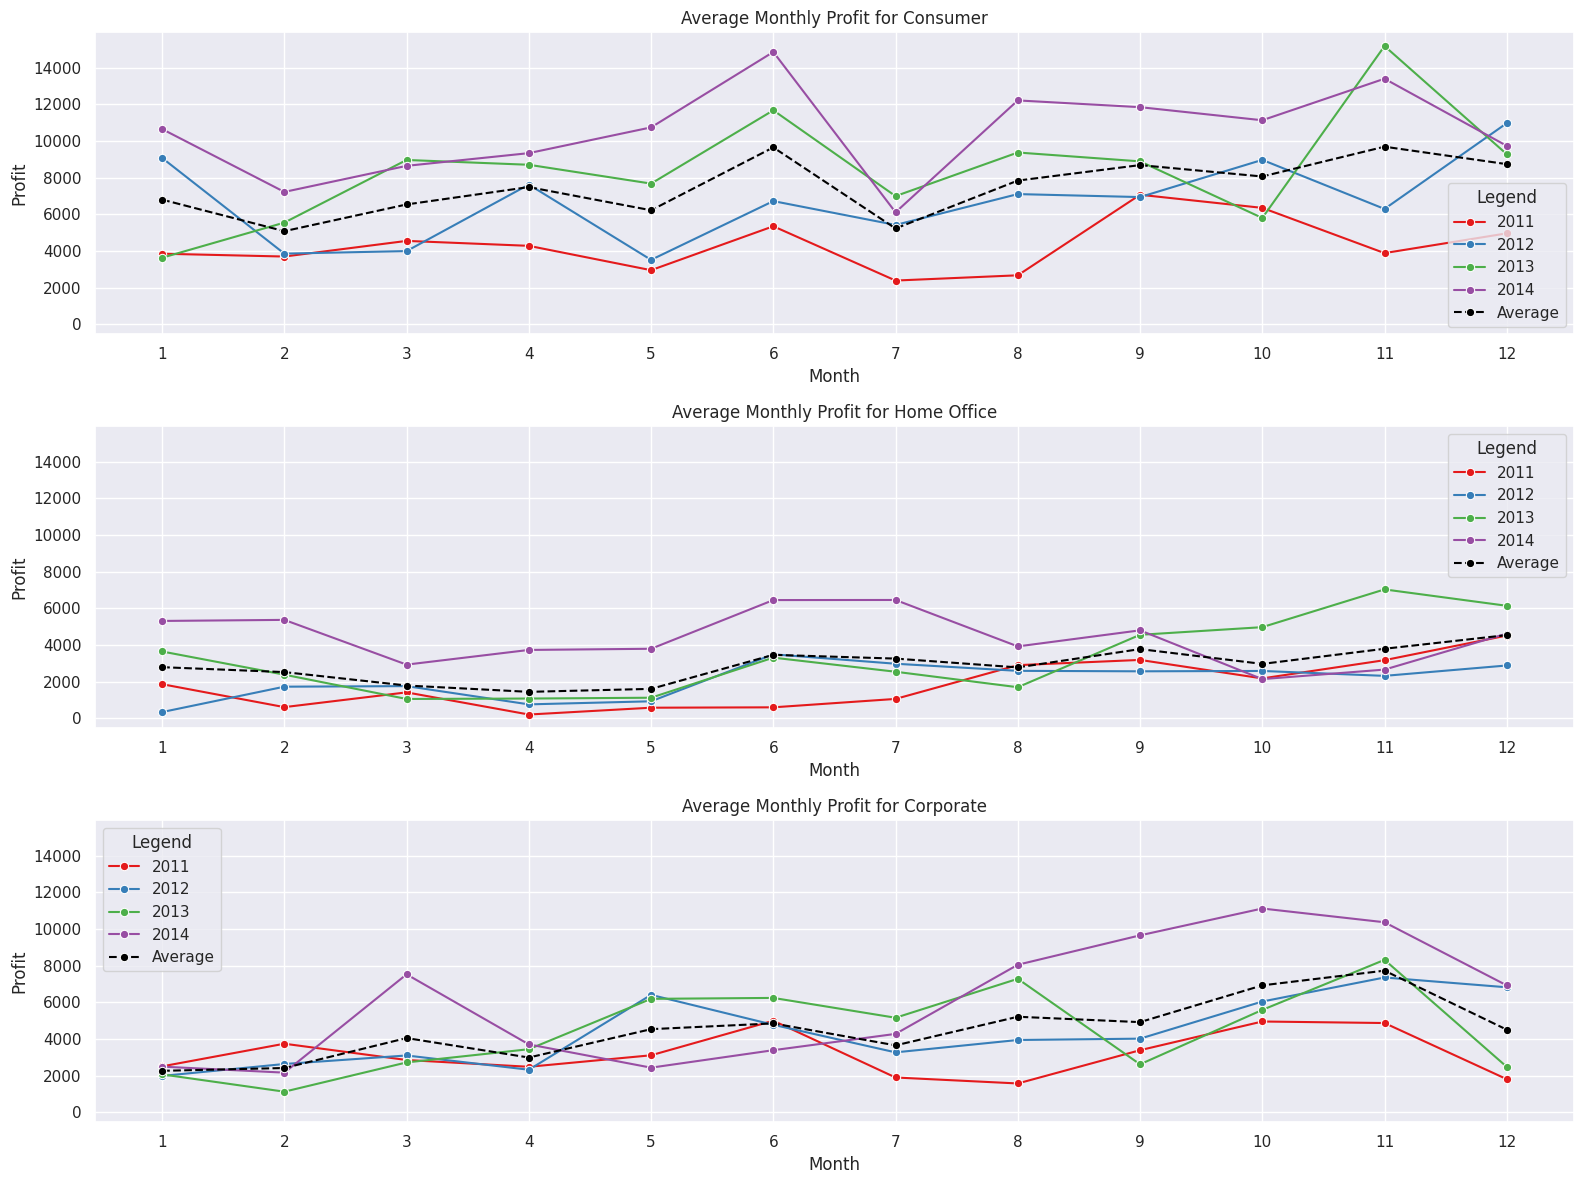

In [412]:

fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharey=True)
axes = axes.flatten()

for i in range(3):
    monthly_profit = (df_time[df_time['segment'] == segments[i]].groupby(['Year', 'Month'])['profit'].sum().reset_index())

    avg_monthly_profit = ( monthly_profit.groupby('Month')['profit'].mean().reset_index())

    sns.lineplot(data=monthly_profit, x='Month', y='profit', hue='Year', marker='o', palette='Set1', ax=axes[i])

    sns.lineplot(data=avg_monthly_profit,x='Month',y='profit',label='Average',color='black',linestyle='--',marker='o',ax=axes[i])

    axes[i].set_title(f'Average Monthly Profit for {segments[i]}')
    axes[i].set_ylabel('Profit')
    axes[i].set_xlabel('Month')
    axes[i].set_xticks(range(1, 13))
    axes[i].grid(True)
    axes[i].legend(title='Legend')

plt.tight_layout()
plt.show()

Now THIS is interesting.

The consumer segment exbhibits the most seasonality.

Home office had exceptional profits in 2014 except for the high season which is peculiar.

Corporate had an exceptional high season in 2014 but with odd profit trends for the year leading up to it, almost an inverse of the usual trend.


##Customers

For customer analysis, I created Recency, Frequency, and Monetary features. Recency represents the time interval between the customer's most recent purchase and the last date of data entry. Frequency represents the number of customer purchases. Monetary represents the amount purchased by the customer. I classified customers into types based on these features.

Classification criteria:

**Highest value customers** (high, high, high): recent consumption time, consumption frequency and consumption amount are very high, absolutely high-quality customers.

**Important retention customers** (low, high, high): The recent consumption time is far away, but the frequency and amount of consumption are very high, indicating that this is a loyal customer who has not been here for a while, and you need to take the initiative to keep in touch with him.

**Important development customers** (high, low, high): Users with recent consumption time, high consumption amount, but low frequency, low loyalty, and high potential must be focused on development.

**Important recapture customers** (low, low, high): The recent consumption time is far away, the consumption frequency is not high, but the consumption amount is high. They may be users who are about to lose or have already lost. Retention measures should be based on

In [413]:
df_RFM = df.groupby('customer_name').agg({'order_date':lambda x:(df['order_date'].max()-x.max()).days,
                                 'order_id':'nunique',
                                 'sales':'sum',
                                 'profit':'sum'})
df_RFM.rename(columns={'order_date':'Recency','order_id':'Frequency','sales':'Monetary'},inplace=True)
DiffYears = df.groupby('customer_name').agg({'order_date':lambda x: x.dt.year.max()-x.dt.year.min()+1}).rename(columns={'order_date':'DiffYears'}).DiffYears
df_RFM['Frequency'] = df_RFM['Frequency'] / DiffYears
df_RFM.head()

Recency  Frequency  Monetary      profit
customer_name                                            
Aaron Bergman         16       9.25   13814.0  2719.62700
Aaron Hawkins         12       7.25    9171.0  -909.88096
Aaron Smayling        26       7.75    9675.0   573.09850
Adam Bellavance       25       9.75    7469.0   764.44690
Adam Hart             31      10.00   14637.0  1708.50072

In [414]:
r_med = df_RFM['Recency'].median()
f_med = df_RFM['Frequency'].median()
m_med = df_RFM['Monetary'].median()

def customer_type_func(frame):
    customer_type_list = []
    for i in range(len(frame)):
        if frame.iloc[i,0]<=r_med and frame.iloc[i,1]>=f_med and frame.iloc[i,2]>=m_med:
            customer_type_list.append('Highest value')
        elif  frame.iloc[i,0]<=r_med and frame.iloc[i,1]<f_med and frame.iloc[i,2]>=m_med:
            customer_type_list.append('Important development')
        elif  frame.iloc[i,0]>r_med and frame.iloc[i,1]>=f_med and frame.iloc[i,2]>=m_med:
            customer_type_list.append('Important retention')
        elif  frame.iloc[i,0]>r_med and frame.iloc[i,1]<f_med and frame.iloc[i,2]>=m_med:
            customer_type_list.append('Important Recapture')
        else:
            customer_type_list.append('Regular')
    frame['customer_type'] = customer_type_list
customer_type_func(df_RFM)
df_RFM

Recency  Frequency  Monetary      profit  \
customer_name                                                  
Aaron Bergman            16       9.25   13814.0  2719.62700   
Aaron Hawkins            12       7.25    9171.0  -909.88096   
Aaron Smayling           26       7.75    9675.0   573.09850   
Adam Bellavance          25       9.75    7469.0   764.44690   
Adam Hart                31      10.00   14637.0  1708.50072   
...                     ...        ...       ...         ...   
Xylona Preis             43       7.00    7013.0   735.88760   
Yana Sorensen             4       7.25    9346.0  1791.55900   
Yoseph Carroll            4       6.75    7754.0  1658.45300   
Zuschuss Carroll          3       9.25   10615.0   594.73716   
Zuschuss Donatelli        1       7.00   10303.0  1271.51910   

                            customer_type  
customer_name                              
Aaron Bergman               Highest value  
Aaron Hawkins                     Regular  
Aaron Smayling                    Regular  
Adam Bellavance                   Regular  
Adam Hart             Important retention  
...                                   ...  
Xylona Preis                      Regular  
Yana Sorensen                     Regular  
Yoseph Carroll                    Regular  
Zuschuss Carroll            Highest value  
Zuschuss Donatelli  Important development  

[795 rows x 5 columns]

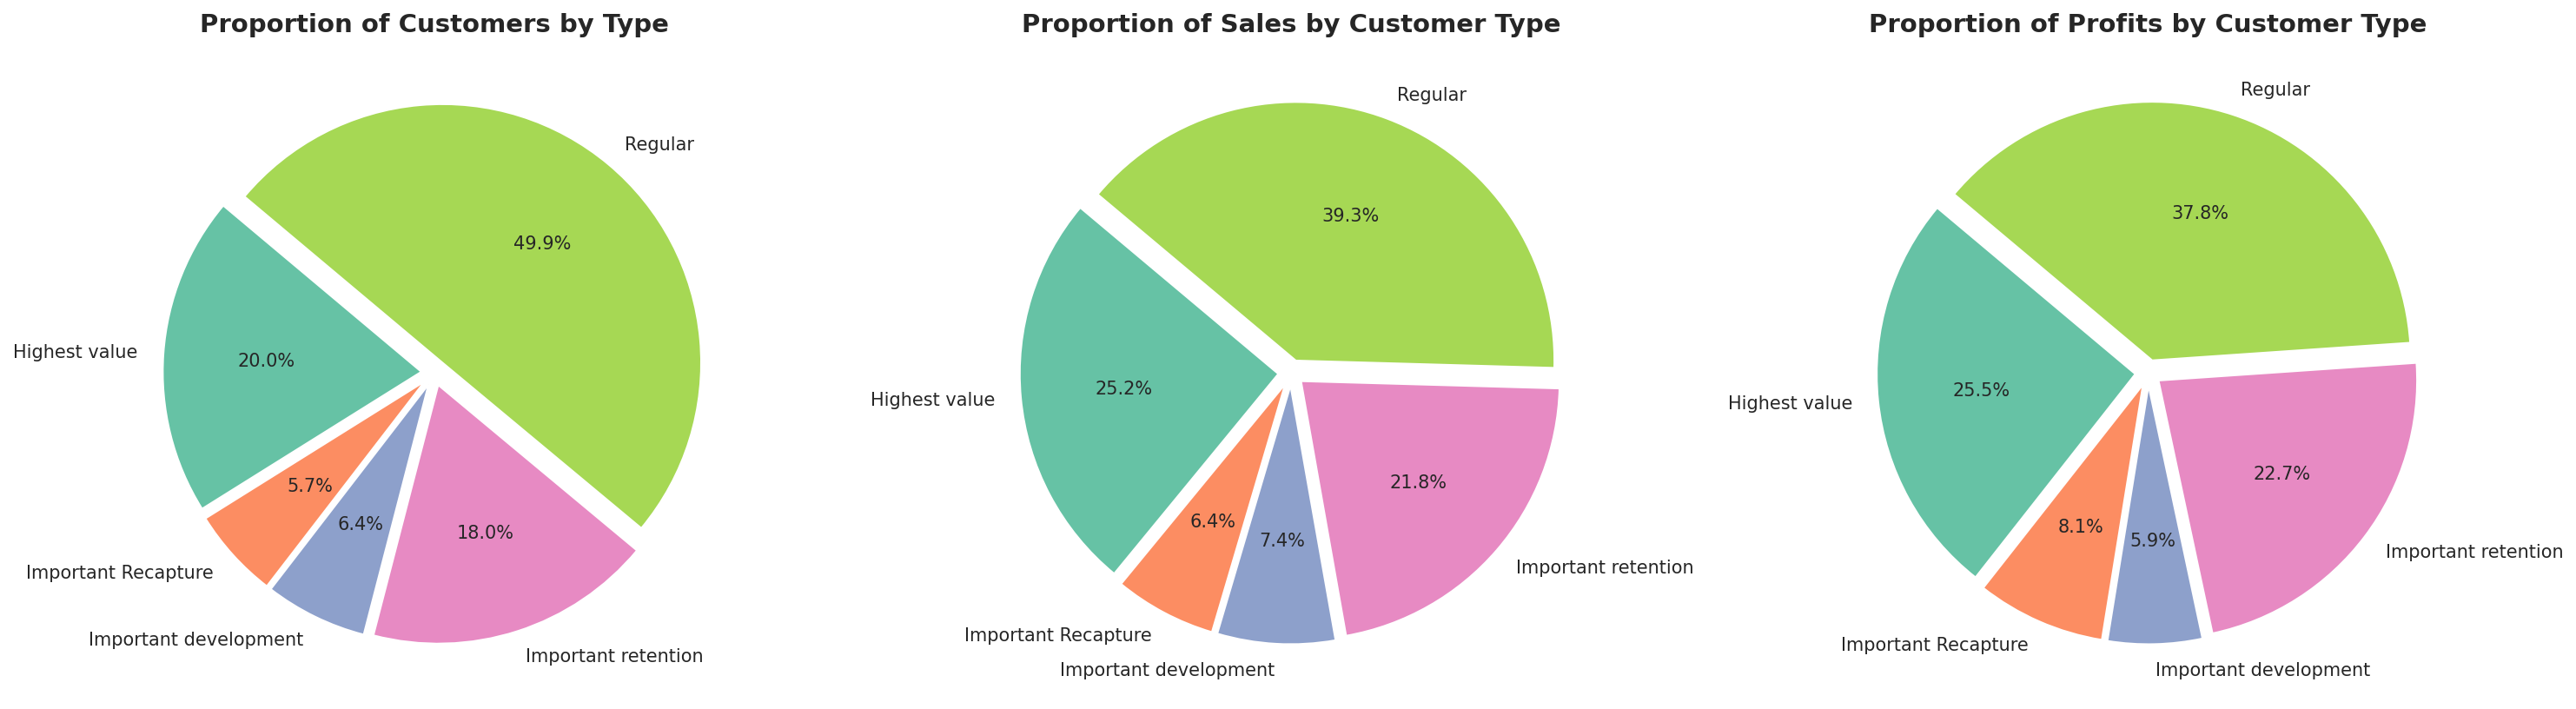

In [415]:
labels = df_RFM.groupby('customer_type').customer_type.size().index
sizes = df_RFM.groupby('customer_type').customer_type.size()
sales_sum = df_RFM.groupby('customer_type')['Monetary'].sum()
profit_sum = df_RFM.groupby('customer_type')['profit'].sum()
explode = [0.05] * len(labels)

fig, axes = plt.subplots(1, 3, figsize=(20, 8), dpi=150)

axes[0].pie(sizes, explode=explode, labels=labels, textprops={'fontsize': 10}, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
axes[0].set_title('Proportion of Customers by Type', fontsize=14, weight='bold', pad=10)

axes[1].pie(sales_sum, explode=explode, labels=labels, textprops={'fontsize': 10}, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
axes[1].set_title('Proportion of Sales by Customer Type', fontsize=14, weight='bold', pad=10)

axes[2].pie(profit_sum, explode=explode, labels=labels, textprops={'fontsize': 10}, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
axes[2].set_title('Proportion of Profits by Customer Type', fontsize=14, weight='bold', pad=10)

plt.tight_layout()
plt.show()

#Action Items Recap

Increase sales of copiers, accesories, and phones.
This can be achieved through:

*   Promotion and discount programs
*   Product Innovation
*   Targeted Marketing
*   Additional sales channels (i.e online sales)

Fix discount system so that best-selling products (binders, art, storage, paper) are sold with little to no discount.

Products with limited sales and higher profitability (copiers, accessories, phones)should be sold at a higher discount to attract customers.


An investigation and/or audit of the Africa and EMEA markets is highly recommended to get an in-depth understanding of their financial situations

 The company should renegotiate rates with its shipping partners.

Investigate what factors besides low cost contributed to record profit in November 2013

Employ retention, development, recapture measures to customers according to their classification.